# Exploratory Data Analysis on Quality of Education.


For this project, we will be analyzing datasets to find a correlation between the number of UC eligible graduates and cost per-pupil spending. More specifically, we will be analyzing data on some of the counties from California.

We have considered 1. Los Angeles and 2. Lake County

Data Source - https://dq.cde.ca.gov/dataquest/

1.*UC ELIGIBILITY* - The University of California (UC) system contains ten campuses spread throughout the state. A popular choice among California students, UC colleges are also open to students from all over the country and the world. If you rank among the top 9 percent of students throughout the state or in your graduating class, you are guaranteed admission (space permitting).

2.*CDS CODES* - County District School Codes. The 14-digit CDS code is the official, unique identification of a school within California. The first two digits identify the county, the next five digits identify the school district, and the last seven digits identify the school.

3.*Current Expenses ADA* - Calculation of current expense (cost) of education per average daily attendance (ADA) pursuant to Education Code Section 41372.

https://www.cde.ca.gov/ds/si/ds/ 
https://www.campusexplorer.com/college-advice-tips/B24719A7/Everything-You-Need-to-Know-About-UC-Eligibility/
https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp

In [3]:
!pip install geopandas

In [4]:
#import required libraries
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

from shapely.geometry import Point #Python package for set-theoretic analysis and manipulation of planar features using (via Python's ctypes module) functions from the well known and widely deployed GEOS library
from geopandas.tools import geocode # convert place names to locations on Earth
from geopandas.tools import reverse_geocode #a set of points to get a GeoDataFrame of the resulting addresses.



%matplotlib inline

# FIRST DATA PREPROCESSING

In [5]:
#read the csv files
URL = "http://dq.cde.ca.gov/dataquest/dlfile/dlfile.aspx?cLevel=All&cYear=2016-17&cCat=Graduates&cPage=filesgrads"

In [6]:
df1 = pd.read_csv(URL, sep="\t")
df1.head()#First five values of the dataset

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170112607,5,M,18,18,1617
1,1100170112607,5,F,19,19,1617
2,1100170112607,2,M,1,1,1617
3,1100170112607,6,M,11,11,1617
4,1100170112607,7,M,4,4,1617


In [7]:
df1.tail() #Last five values of the dataset

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
21602,58727695838305,1,M,2,2,1617
21603,58727695838305,9,F,3,3,1617
21604,58727695838305,7,F,37,18,1617
21605,58727695838305,5,M,29,17,1617
21606,58727695838305,3,M,1,1,1617


In [9]:
#Print records from one school
df2 = df1.loc[df1['CDS_CODE'] == 19645191937481]

In [11]:
#print records from one school
df1.loc[df1['CDS_CODE'] == 33671243333770]

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
11600,33671243333770,4,F,3,3,1617
11601,33671243333770,9,M,2,2,1617
11602,33671243333770,2,F,1,1,1617
11603,33671243333770,6,F,33,13,1617
11604,33671243333770,4,M,3,0,1617
11605,33671243333770,3,F,2,1,1617
11606,33671243333770,9,F,3,1,1617
11607,33671243333770,5,M,177,69,1617
11608,33671243333770,6,M,21,3,1617
11609,33671243333770,1,M,2,0,1617


In [12]:
# A dataframe with only Los Angeles County schools (L.A.'s county code is 19; the first two digits of the CDS Code)
df3=df1.loc[df1['CDS_CODE'] >= 19000000000000] #Selecting using the county code and setting start and end bracket
df3=df3.loc[df3['CDS_CODE'] < 20000000000000]

In [13]:
print(df3)

            CDS_CODE  ETHNIC GENDER  GRADS  UC_GRADS  YEAR
3895  19101990109942       4      M      1         1  1617
3896  19101990109942       5      F     26        26  1617
3897  19101990109942       5      M     24        24  1617
3898  19101990109942       7      F      1         1  1617
3899  19101990112128       5      M     68        68  1617
...              ...     ...    ...    ...       ...   ...
8246  19768850132928       5      F     13        10  1617
8247  19768850132928       5      M     11         9  1617
8248  19769680109926       0      F      1         0  1617
8249  19769680109926       5      M     34        21  1617
8250  19769680109926       5      F     33        27  1617

[4356 rows x 6 columns]


So the LA County schools cover 4356 rows from the data.

Calculate the percentage of the males and females in this LA dataframe.

In [15]:
#make a list of schools and lists of the percentage of students who graduated UC-eligible
#create dictionaries
sch=df1['CDS_CODE'][3895] #3895 is the first record from the list of LA records
code=[]
rate=[]
rate1=[]
grad=0 #Setting to zero
ucgrad=0 #setting to zero
#using the for loop for calculating percentage 
for i in range(3895,8251):     #selecting a range of schools
  if df1['CDS_CODE'][i]==sch:  # sch=Schools
    grad+=df1['GRADS'][i]      #grads column
    ucgrad+=df1['UC_GRADS'][i] #UC Grads column
  else:
    code.append(sch)
    if grad==0:
      rate.append(0)
      rate1.append(0)
    else:
      rate.append(100*ucgrad/grad) #Append the data
      rate1.append(100*ucgrad/grad)
    sch=df1['CDS_CODE'][i]
    grad=df1['GRADS'][i]
    ucgrad=df1['UC_GRADS'][i]
  if i==8250:
    code.append(sch)
    rate.append(100*ucgrad/grad)
    rate1.append(100*ucgrad/grad)

In [16]:
print(code)

[19101990109942, 19101990112128, 19101990121822, 19101990121871, 19101990121897, 19101990121905, 19101990121921, 19101990121939, 19101990121970, 19101990121988, 19101990121996, 19101990122010, 19101990122028, 19101990122036, 19101990122044, 19101990122051, 19101990122077, 19101990123604, 19101990123612, 19101990127274, 19101990127522, 19101991933399, 19101991995232, 19101991995869, 19101991996008, 19101991996172, 19101991996214, 19642120000000, 19642120000001, 19642121930056, 19642121930361, 19642121931641, 19642121931880, 19642121933159, 19642121995596, 19642460100081, 19642460108407, 19642460111872, 19642460115337, 19642460126003, 19642461930213, 19642461931732, 19642461936624, 19642461937051, 19642461995398, 19642461995406, 19642461995844, 19642461995968, 19642461996537, 19642461996644, 19642610000001, 19642611930288, 19642611995299, 19642791930528, 19642791931765, 19642791933449, 19642870000001, 19642870114397, 19642871930601, 19642871936384, 19642871938166, 19642871996479, 1964295

In [17]:
#percent of UC-eligible graduates
print(rate)

[100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 64.58333333333333, 0.0, 37.878787878787875, 1.1904761904761905, 0.0, 0.0, 16.666666666666668, 0.0, 71.08910891089108, 51.64473684210526, 0.8771929824561403, 99.37888198757764, 49.46695095948827, 0.0, 41.515151515151516, 40.368852459016395, 91.01123595505618, 11.11111111111111, 70.0, 38.69346733668342, 87.2, 27.671755725190838, 41.1144578313253, 30.134932533733135, 29.51388888888889, 28.571428571428573, 0.0, 0.28328611898017, 1.0, 0.0, 67.14285714285714, 0.0, 44.28044280442804, 0.0, 35.14644351464435, 0.0, 18.28358208955224, 33.7962962962963, 0.0, 43.333333333333336, 44.05594405594405, 40.0, 4.166666666666667, 32.773109243697476, 51.06837606837607, 0.0, 0.0, 64.52513966480447, 0.0, 0.0, 66.4543524416136, 0.0, 51.05740181268882, 0.0, 0.0, 51.014040561622465, 53.21739130434783, 0.0, 0.0, 10.714285714285714, 0.0, 0.0, 0.0, 98.75, 100.0, 0.0, 27.671232876712327, 46.05263157894737, 4

In [18]:
#UC-eligible grad percentage for example school
rate[code.index(19753090131557)]

0.0

In [19]:
#UC-eligible grad percentage for example school
rate[code.index(19101991933399)]

64.58333333333333

In [20]:
#building a statistics for the rate of the UC eligible students

print("Mean: "+str(statistics.mean(rate)))
print("Median: "+str(statistics.median(rate)))
print("Mode: "+str(statistics.mode(rate)))
print("Min: "+str(min(rate)))
print("Max: "+str(max(rate)))

Mean: 41.63184343195862
Median: 45.8737363317516
Mode: 0.0
Min: 0.0
Max: 100.0


In [21]:
#Calculate which schools fall in which percentatge ranges for the UC Eligible students.
ucrate1=[]
rate1.sort()
for i in rate1:
  if i<=20:
    ucrate1.append("0-20%")
  elif i<=40:
    ucrate1.append("21-40%")
  elif i<=60:
    ucrate1.append("41-60%")
  elif i<=80:
    ucrate1.append("61-80%")
  else:
    ucrate1.append("81-100%")
print(ucrate1)

['0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', 

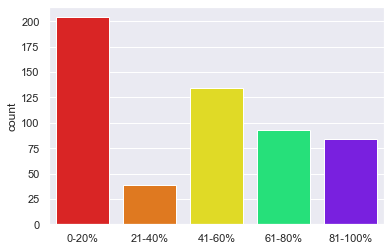

In [22]:
#plot the schools in their respective percentage range of UC eligible candidates.
import seaborn as sns

sns.set_theme(style="darkgrid")

gradecolor=['#F70707','#FF7700','#FFF707','#07FF77','#7700FF']

ax = sns.countplot(x=ucrate1, palette=gradecolor)

The observation from the above plot is that the count of the schools where only 20% students are eligible is highest. 

<AxesSubplot:>

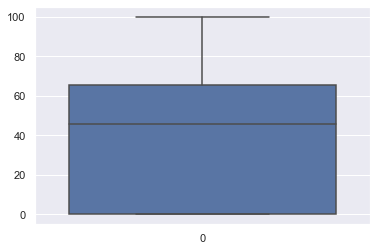

In [23]:
#boxplot of the UC-eligible gradute rate
sns.boxplot(data=rate)

# PREPROCESSING THE SECOND DATASET

In [24]:
#Loading the data from California School Directory
URL5="https://www.cde.ca.gov/schooldirectory/report?rid=dl1&tp=txt"
df5= pd.read_csv(URL5, sep="\t")
df5.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
0,1100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,No Data,No Data,No Data,No Data,37.658212,-122.09713,L.K.,Monroe,lkmonroe@acoe.org,06/25/2021
1,1100170109835,0691051,10546,Closed,Alameda,Alameda County Office of Education,FAME Public Charter,"39899 Balentine Drive, Suite 335","39899 Balentine Dr., Ste. 335",Newark,...,P,N,N,No Data,37.521436,-121.99391,No Data,No Data,No Data,09/01/2015
2,1100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,...,N,N,N,0601614,37.804520,-122.26815,Marjorie,Johnson,mjohnson@envisionacademy.org,09/08/2021
3,1100170118489,0691051,12283,Closed,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,2125 Jefferson Avenue,2125 Jefferson Ave.,Berkeley,...,N,N,N,No Data,37.868991,-122.27844,No Data,No Data,No Data,07/01/2015
4,1100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,...,N,N,N,0601691,37.784648,-122.23863,Ida,Oberman,ida@communityschoolforcreativeeducation.org,10/08/2020


In [25]:
#Sort the data to just include the Active Schools from the abpove dataframe
df6=df5[df5.StatusType == 'Active']
df6.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
0,1100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,No Data,No Data,No Data,No Data,37.658212,-122.09713,L.K.,Monroe,lkmonroe@acoe.org,06/25/2021
2,1100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,...,N,N,N,0601614,37.804520,-122.26815,Marjorie,Johnson,mjohnson@envisionacademy.org,09/08/2021
4,1100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,...,N,N,N,0601691,37.784648,-122.23863,Ida,Oberman,ida@communityschoolforcreativeeducation.org,10/08/2020


In [26]:
#Sort the data on valid geographic locations
df7 = df6[df6.County=='Los Angeles']
df7 = df6.loc[(df6['Latitude'].notnull()) & df6['Longitude'].notnull()]


In [27]:
df7.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
0,1100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,No Data,No Data,No Data,No Data,37.658212,-122.09713,L.K.,Monroe,lkmonroe@acoe.org,06/25/2021
2,1100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,...,N,N,N,0601614,37.804520,-122.26815,Marjorie,Johnson,mjohnson@envisionacademy.org,09/08/2021
4,1100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,...,N,N,N,0601691,37.784648,-122.23863,Ida,Oberman,ida@communityschoolforcreativeeducation.org,10/08/2020


In [28]:
#convert the latitude and the longitude values to floats
df7=df7.loc[df7['Longitude']!="No Data"]
df7["Longitude"] = pd.to_numeric(df7["Longitude"], downcast="float")
df7["Latitude"] = pd.to_numeric(df7["Latitude"], downcast="float")

In [29]:
#create a combined column 'Locations' for the latitude and longitude
df7['Locations'] = list(df7[['Longitude', 'Latitude']].values)
df7.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,Locations
0,1100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,No Data,No Data,No Data,37.658211,-122.097130,L.K.,Monroe,lkmonroe@acoe.org,06/25/2021,"[-122.09713, 37.65821]"
2,1100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,...,N,N,0601614,37.804520,-122.268150,Marjorie,Johnson,mjohnson@envisionacademy.org,09/08/2021,"[-122.26815, 37.80452]"
4,1100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,...,N,N,0601691,37.784649,-122.238632,Ida,Oberman,ida@communityschoolforcreativeeducation.org,10/08/2020,"[-122.23863, 37.78465]"


In [30]:
#Making locations into geo-readable points
df7['Locations'] = df7['Locations'].apply(Point)

In [31]:
df7.head(4)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,Locations
0,1100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,No Data,No Data,No Data,37.658211,-122.097130,L.K.,Monroe,lkmonroe@acoe.org,06/25/2021,POINT (-122.0971298217773 37.65821075439453)
2,1100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,...,N,N,0601614,37.804520,-122.268150,Marjorie,Johnson,mjohnson@envisionacademy.org,09/08/2021,POINT (-122.2681503295898 37.80451965332031)
4,1100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,...,N,N,0601691,37.784649,-122.238632,Ida,Oberman,ida@communityschoolforcreativeeducation.org,10/08/2020,POINT (-122.2386322021484 37.78464889526367)
5,1100170124172,0691051,12901,Active,Alameda,Alameda County Office of Education,Yu Ming Charter,1086 Alcatraz Avenue,1086 Alcatraz Ave.,Oakland,...,N,N,0602013,37.847374,-122.283562,Sue,Park,spark@yumingschool.org,02/13/2019,POINT (-122.283561706543 37.84737396240234)


In [32]:
#Form a list that lines up the percentage of UC-eligible graduates with the correct CDS Code in the dataframe
pointer=[]
nonbin=[]
for k in df7['CDSCode']:
  if k in code:
    i=code.index(k)
    pointer.append(ucrate1[i])
    nonbin.append(rate[i])
  else:
    pointer.append(None)
    nonbin.append(None)
print(pointer)
print(nonbin)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [33]:
#Create a new column with the list of lined up UC-eligible graduate percentages using pointer
df7['binner']=pointer
df7['UC-EligiblePercent']=nonbin
df7.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,Locations,binner,UC-EligiblePercent
0,1100170000000,0691051,No Data,Active,Alameda,Alameda County Office of Education,No Data,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,No Data,37.658211,-122.097130,L.K.,Monroe,lkmonroe@acoe.org,06/25/2021,POINT (-122.0971298217773 37.65821075439453),None,NaN
2,1100170112607,0691051,10947,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,...,0601614,37.804520,-122.268150,Marjorie,Johnson,mjohnson@envisionacademy.org,09/08/2021,POINT (-122.2681503295898 37.80451965332031),None,NaN
4,1100170123968,0691051,12844,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,...,0601691,37.784649,-122.238632,Ida,Oberman,ida@communityschoolforcreativeeducation.org,10/08/2020,POINT (-122.2386322021484 37.78464889526367),None,NaN
5,1100170124172,0691051,12901,Active,Alameda,Alameda County Office of Education,Yu Ming Charter,1086 Alcatraz Avenue,1086 Alcatraz Ave.,Oakland,...,0602013,37.847374,-122.283562,Sue,Park,spark@yumingschool.org,02/13/2019,POINT (-122.283561706543 37.84737396240234),None,NaN
6,1100170125567,0691051,13008,Active,Alameda,Alameda County Office of Education,Urban Montessori Charter,4551 Steele Street,4551 Steele St.,Oakland,...,0601816,37.786793,-122.188171,Krishna,Feeney,krishnaf@urbanmontessori.org,08/16/2020,POINT (-122.1881713867188 37.78679275512695),None,NaN


In [34]:
#Remove rows with null values in the UC-eligible percentage column from dataframe (gets rid of elementary and middle schools)
df7 = df7[df7['binner'].notna()] #detects existing/ non-missing values in the dataframe.
df7.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,Locations,binner,UC-EligiblePercent
3598,19101990112128,0691078,11655,Active,Los Angeles,Los Angeles County Office of Education,Aspire Ollin University Preparatory Academy,2540 East 58th Street,2540 East 58th St.,Huntington Park,...,0601857,33.990154,-118.226532,Joel,Ramirez,data-contact@aspirepublicschools.org,11/04/2021,POINT (-118.2265319824219 33.99015426635742),0-20%,100.0
3603,19101990121822,0691078,12665,Active,Los Angeles,Los Angeles County Office of Education,"Nidorf, Barry J.",16350 Filbert Street,16350 Filbert St.,Sylmar,...,No Data,34.314484,-118.484123,Ruben,Carranza,carranza_ruben@lacoe.edu,11/04/2021,POINT (-118.4841232299805 34.31448364257812),0-20%,0.0
3605,19101990121897,0691078,12696,Active,Los Angeles,Los Angeles County Office of Education,Central Juvenile Hall,1605 Eastlake Avenue,1605 Eastlake Ave.,Los Angeles,...,No Data,34.063496,-118.205872,Michael,Massa,massa_michael@lacoe.edu,08/13/2020,POINT (-118.2058715820312 34.06349563598633),0-20%,0.0
3606,19101990121905,0691078,12777,Active,Los Angeles,Los Angeles County Office of Education,"Kirby, Dorothy Camp",1500 South McDonnell Avenue,1500 South McDonnell Ave.,City Of Commerce,...,No Data,34.011982,-118.170189,Donna,Baker,baker_donna@lacoe.edu,06/15/2021,POINT (-118.1701889038086 34.01198196411133),0-20%,0.0
3607,19101990121921,0691078,12710,Active,Los Angeles,Los Angeles County Office of Education,Afflerbaugh-Paige Camp,6621 North Stephens Ranch Road,6621 North Stephens Ranch Rd.,La Verne,...,No Data,34.152077,-117.742432,John,Cotton,cotton_john@lacoe.edu,08/13/2020,POINT (-117.742431640625 34.15207672119141),0-20%,0.0


In [35]:
#Taken from https://github.com/johan/world.geo.json/blob/master/countries/USA/CA/Los%20Angeles.geo.json
map_df = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/CA/Los%20Angeles.geo.json")
map_df.head()

,kind,name,state,geometry
0,county,Los Angeles,CA,"MULTIPOLYGON (((-117.66870 34.82040, -117.6468..."


<AxesSubplot:>

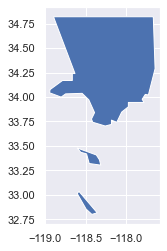

In [36]:
map_df.plot()

In [37]:
#Form smaller dataframe with more relevant information
lageo=df7[['CDSCode','School', 'Locations', 'binner','UC-EligiblePercent']]
lageo.head()

,CDSCode,School,Locations,binner,UC-EligiblePercent
3598,19101990112128,Aspire Ollin University Preparatory Academy,POINT (-118.2265319824219 33.99015426635742),0-20%,100.0
3603,19101990121822,"Nidorf, Barry J.",POINT (-118.4841232299805 34.31448364257812),0-20%,0.0
3605,19101990121897,Central Juvenile Hall,POINT (-118.2058715820312 34.06349563598633),0-20%,0.0
3606,19101990121905,"Kirby, Dorothy Camp",POINT (-118.1701889038086 34.01198196411133),0-20%,0.0
3607,19101990121921,Afflerbaugh-Paige Camp,POINT (-117.742431640625 34.15207672119141),0-20%,0.0


In [38]:
type(lageo['Locations'])

pandas.core.series.Series

In [39]:
#Split dataframe into smaller dataframes according to percentages
lageo20=lageo.loc[lageo['binner'] == '0-20%']
lageo40=lageo.loc[lageo['binner'] == '21-40%']
lageo60=lageo.loc[lageo['binner'] == '41-60%']
lageo80=lageo.loc[lageo['binner'] == '61-80%']
lageo100=lageo.loc[lageo['binner'] == '81-100%']

In [40]:
#Make mapable
geola20df = gpd.GeoDataFrame(lageo20, geometry='Locations')
geola40df = gpd.GeoDataFrame(lageo40, geometry='Locations')
geola60df = gpd.GeoDataFrame(lageo60, geometry='Locations')
geola80df = gpd.GeoDataFrame(lageo80, geometry='Locations')
geola100df = gpd.GeoDataFrame(lageo100, geometry='Locations')

<AxesSubplot:>

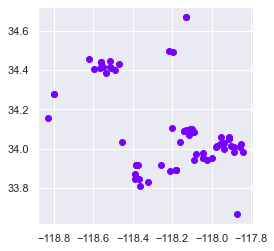

In [41]:
#Rank 1 schools
geola100df.plot(color='#7700FF')

<AxesSubplot:>

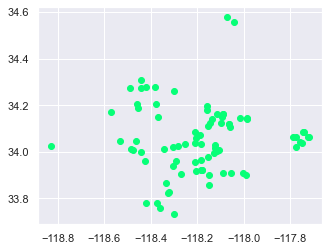

In [42]:
#Rank 2 schools
geola80df.plot(color='#07FF77')

<AxesSubplot:>

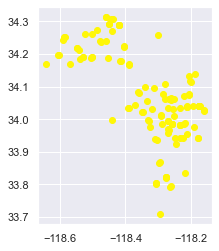

In [43]:
#Rank 3 schools
geola60df.plot(color='#FFF707')

<AxesSubplot:>

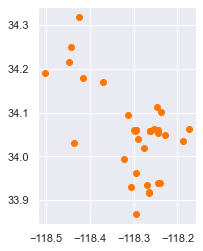

In [44]:
#Rank 4 schools
geola40df.plot(color='#FF7700')

<AxesSubplot:>

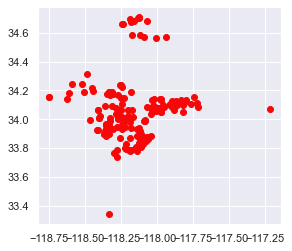

In [45]:
#Rank 5 schools
geola20df.plot(color='#F70707')

HEX COLOR CODES IN PYTHON - https://www.webucator.com/article/python-color-constants-module/

Text(0.5, 1.0, 'Los Angeles Schools by UC-Eligible Grads')

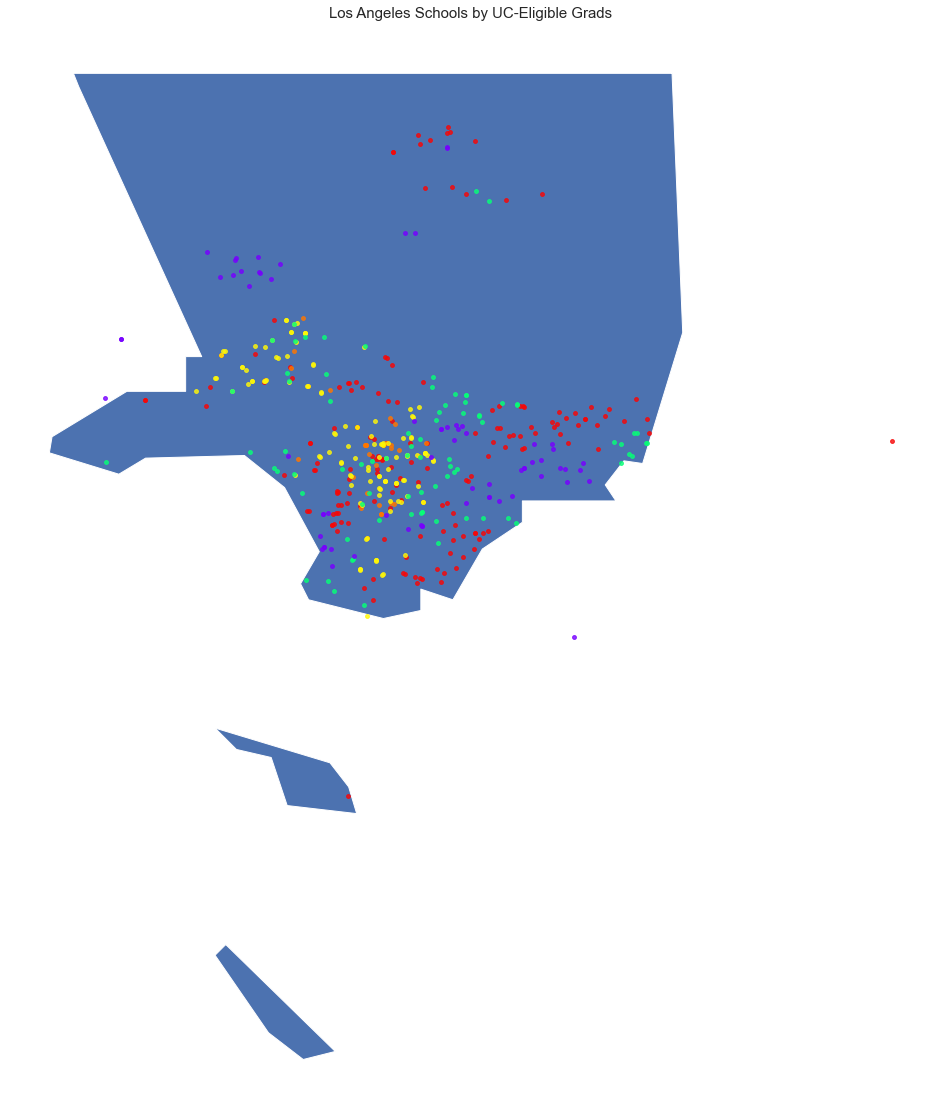

In [47]:
#Plot schools over map of L.A. County color-coded by percentage of UC-eligible students
#the marker are used to select the type pointers on the map plot (https://matplotlib.org/stable/api/markers_api.html)
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geola20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geola40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geola60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geola80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geola100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Los Angeles Schools by UC-Eligible Grads", fontsize=15, fontweight=3)

As we observe in the above plot the frequency of the red plots is higher which suugests that the Rank 5 schools are in higher numbers and Rank 4 schools are the least in numbers.

MONEY DATA ANALYSIS

In [48]:
#from https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp 
#Current Expense per Average Daily Attendance

URL2="https://www.cde.ca.gov/ds/fd/ec/documents/currentexpense1617.xlsx"

#first few rows contain description of data, not the actual data
df8 = pd.read_excel(URL2,skiprows=[0,1,2,3,4,5,6,7]) 
df8.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
0,1,61119,Alameda Unified,1.048464e+08,9061.77,11570.193309,Unified
1,1,61127,Albany City Unified,4.381278e+07,3601.47,12165.247807,Unified
2,1,61143,Berkeley Unified,1.421931e+08,9171.43,15503.921472,Unified
3,1,61150,Castro Valley Unified,9.131184e+07,9022.97,10119.931991,Unified
4,1,61168,Emery Unified,1.102028e+07,644.25,17105.601024,Unified


In [49]:
#Make dataframe of only L.A. County school districts
df9=df8.loc[df8['CO'] == 19]
df9.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
245,19,64212,ABC Unified,2.086270e+08,20041.91,10409.536830,Unified
246,19,64246,Antelope Valley Union High,2.380238e+08,19881.81,11971.935759,High
247,19,64261,Arcadia Unified,9.599930e+07,9315.96,10304.820542,Unified
248,19,64279,Azusa Unified,1.081292e+08,8358.01,12937.189278,Unified
249,19,64287,Baldwin Park Unified,1.554206e+08,13107.37,11857.493834,Unified


<AxesSubplot:>

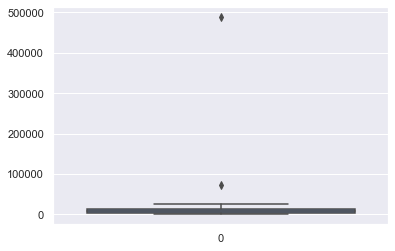

In [50]:
#Boxplot of Current Expense ADA in LA
temp=[]
for i in df9['Current Expense ADA']:
  temp.append(i)
sns.boxplot(data=temp)

Calculating for some statistics 

In [51]:
print("Mean: "+str(statistics.mean(temp)))
print("Median: "+str(statistics.median(temp)))
print("Min: "+str(min(temp)))
print("Max: "+str(max(temp)))

Mean: 15963.519
Median: 8319.6
Min: 84.29
Max: 489198.82


In [52]:
#Identify outliers
temp.sort()
print(temp[-1])
print(temp[-2])

489198.82
72563.98


In [53]:
#Find minimum and maximum
min1=min(df9['Current Expense ADA'])
max1=max(df9['Current Expense ADA'])

In [54]:
#calculating the minmax for the 'Current Expense ADA' column
minmax=[]
for value in df9['Current Expense ADA']:
  m3=(value-min1)/(max1-min1)
  minmax.append(m3*100)
print(minmax)

[4.080357212041932, 4.04762459213796, 1.8874250167951456, 1.6915710927663505, 2.6625829332855844, 0.6988813029128371, 2.426090265607116, 0.7741622396701239, 1.9985830312585475, 2.983031397574715, 0.4264584002442127, 1.2147073201853154, 0.953868616415873, 1.373414525223775, 2.3499404117068448, 1.3273721392001991, 4.363176452762505, 0.6544990597600934, 0.6475661232145362, 1.7197526313520066, 1.6984058927875234, 1.7251031164418686, 1.675865159843033, 0.667115736676234, 0.9380400128370752, 5.120798599052046, 1.4750267181798913, 0.0, 1.5528101363089746, 0.25409590673987953, 0.02138967329390112, 1.888136506596931, 0.500203909297072, 0.8081685898801656, 2.7133869852527175, 2.2401256409209513, 1.0659507498172258, 1.0609273864753106, 0.8576539323008866, 14.818551802171978, 100.0, 0.3117797379685286, 0.6076838486069919, 2.790689943314503, 1.0792237147401857, 5.262796016303175, 1.3612721748421581, 1.310770710491876, 3.5696915403433214, 3.698000956953783, 2.2454638589452656, 3.0040019461290584, 3.

In [55]:
df9['scaled_CurrentExpenseAda']=minmax


<ipython-input-55-ef5997ca353a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['scaled_CurrentExpenseAda']=minmax


In [56]:
money_bins=[]
for i in minmax:
  if i<=20:
    money_bins.append("0-20%")
  elif i<=40:
    money_bins.append("21-40%")
  elif i<=60:
    money_bins.append("41-60%")
  elif i<=80:
    money_bins.append("61-80%")
  else:
    money_bins.append("81-100%")
print(money_bins)

['0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '81-100%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%']


In [57]:
df9['scaled_bins_CurrentExpenseAda'] = money_bins #Adding the percentage bins under the column 

<ipython-input-57-abb97d428e45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['scaled_bins_CurrentExpenseAda'] = money_bins #Adding the percentage bins under the column


In [58]:
df9

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CurrentExpenseAda,scaled_bins_CurrentExpenseAda
245,19,64212,ABC Unified,2.086270e+08,20041.91,10409.536830,Unified,4.080357,0-20%
246,19,64246,Antelope Valley Union High,2.380238e+08,19881.81,11971.935759,High,4.047625,0-20%
247,19,64261,Arcadia Unified,9.599930e+07,9315.96,10304.820542,Unified,1.887425,0-20%
248,19,64279,Azusa Unified,1.081292e+08,8358.01,12937.189278,Unified,1.691571,0-20%
249,19,64287,Baldwin Park Unified,1.554206e+08,13107.37,11857.493834,Unified,2.662583,0-20%
...,...,...,...,...,...,...,...,...,...
320,19,75309,Acton-Agua Dulce Unified,1.474388e+07,1036.27,14227.833354,Unified,0.194633,0-20%
321,19,75333,Manhattan Beach Unified,7.253017e+07,6521.58,11121.564865,Unified,1.316111,0-20%
322,19,75341,Redondo Beach Unified,8.699906e+07,9406.06,9249.256217,Unified,1.905846,0-20%
323,19,75713,Alhambra Unified,1.913385e+08,16622.37,11510.903616,Unified,3.381229,0-20%


In [59]:
#Form a list that lines up the money rate with the correct CDS Code in the dataframe
cbin=[]
cnobin=[]
for k in lageo['CDSCode']:
  g=int(str(k)[2:7])
  t=0
  for h in df9['CDS']:
    if g==h:
      i=df9[df9['CDS']==h].index.item()
      cbin.append(df9['scaled_bins_CurrentExpenseAda'][i])
      cnobin.append(df9['scaled_CurrentExpenseAda'][i])
      t=1
  if t==0:
    cbin.append(None)
    cnobin.append(None)
print(cbin)
print(cnobin)

[None, None, None, None, None, None, None, None, None, '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', 

In [60]:
#Add money rates as new columns in map dataframe
lageo['CBin']=cbin #cashbin
lageo['CPercent']=cnobin #cashpercentage
lageo

<ipython-input-60-a2f45c9bfe7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lageo['CBin']=cbin
<ipython-input-60-a2f45c9bfe7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lageo['CPercent']=cnobin


,CDSCode,School,Locations,binner,UC-EligiblePercent,CBin,CPercent
3598,19101990112128,Aspire Ollin University Preparatory Academy,POINT (-118.2265319824219 33.99015426635742),0-20%,100.000000,None,NaN
3603,19101990121822,"Nidorf, Barry J.",POINT (-118.4841232299805 34.31448364257812),0-20%,0.000000,None,NaN
3605,19101990121897,Central Juvenile Hall,POINT (-118.2058715820312 34.06349563598633),0-20%,0.000000,None,NaN
3606,19101990121905,"Kirby, Dorothy Camp",POINT (-118.1701889038086 34.01198196411133),0-20%,0.000000,None,NaN
3607,19101990121921,Afflerbaugh-Paige Camp,POINT (-117.742431640625 34.15207672119141),0-20%,0.000000,None,NaN
...,...,...,...,...,...,...,...
7261,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),81-100%,5.555556,0-20%,3.381229
7287,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,0.484725
7288,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,0.484725
7290,19768690131128,Da Vinci Communications,POINT (-118.3839797973633 33.91777420043945),81-100%,100.000000,0-20%,0.484725


In [61]:
#remove null values from the above CBin column of the dataframe
lageo1 = lageo[lageo['CBin'].notna()]
lageo1

,CDSCode,School,Locations,binner,UC-EligiblePercent,CBin,CPercent
4040,19642120000000,No Data,POINT (-118.0725479125977 33.87898635864258),0-20%,16.666667,0-20%,4.080357
4041,19642121930056,Cerritos High,POINT (-118.0647888183594 33.86546325683594),0-20%,71.089109,0-20%,4.080357
4043,19642121930361,Artesia High,POINT (-118.0744018554688 33.84596252441406),0-20%,51.644737,0-20%,4.080357
4044,19642121931641,Tracy (Wilbur) High (Continuation),POINT (-118.0719909667969 33.87896728515625),0-20%,0.877193,0-20%,4.080357
4045,19642121931880,Whitney (Gretchen) High,POINT (-118.0551071166992 33.87899780273438),0-20%,99.378882,0-20%,4.080357
...,...,...,...,...,...,...,...
7260,19757131937697,San Gabriel High,POINT (-118.1080169677734 34.09192276000977),81-100%,63.940520,0-20%,3.381229
7261,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),81-100%,5.555556,0-20%,3.381229
7287,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,0.484725
7288,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,0.484725


In [62]:
#Set each category to its own dataframe by percentage of uc-eligible grads/funding
geouc20=lageo1.loc[lageo1['binner'] == '0-20%']
geouc40=lageo1.loc[lageo1['binner'] == '21-40%']
geouc60=lageo1.loc[lageo1['binner'] == '41-60%']
geouc80=lageo1.loc[lageo1['binner'] == '61-80%']
geouc100=lageo1.loc[lageo1['binner'] == '81-100%']
geocash20=lageo1.loc[lageo1['CBin'] == '0-20%']
geocash40=lageo1.loc[lageo1['CBin'] == '21-40%']
geocash60=lageo1.loc[lageo1['CBin'] == '41-60%']
geocash80=lageo1.loc[lageo1['CBin'] == '61-80%']
geocash100=lageo1.loc[lageo1['CBin'] == '81-100%']

In [63]:
#Make previous dataframes mapable
geouc20df = gpd.GeoDataFrame(geouc20, geometry='Locations')
geouc40df = gpd.GeoDataFrame(geouc40, geometry='Locations')
geouc60df = gpd.GeoDataFrame(geouc60, geometry='Locations')
geouc80df = gpd.GeoDataFrame(geouc80, geometry='Locations')
geouc100df = gpd.GeoDataFrame(geouc100, geometry='Locations')
geocash20df = gpd.GeoDataFrame(geocash20, geometry='Locations')
geocash40df = gpd.GeoDataFrame(geocash40, geometry='Locations')
geocash60df = gpd.GeoDataFrame(geocash60, geometry='Locations')
geocash80df = gpd.GeoDataFrame(geocash80, geometry='Locations')
geocash100df = gpd.GeoDataFrame(geocash100, geometry='Locations')

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Text(0.5, 1.0, 'Los Angeles Schools by UC-Eligible Grads Over Funding')

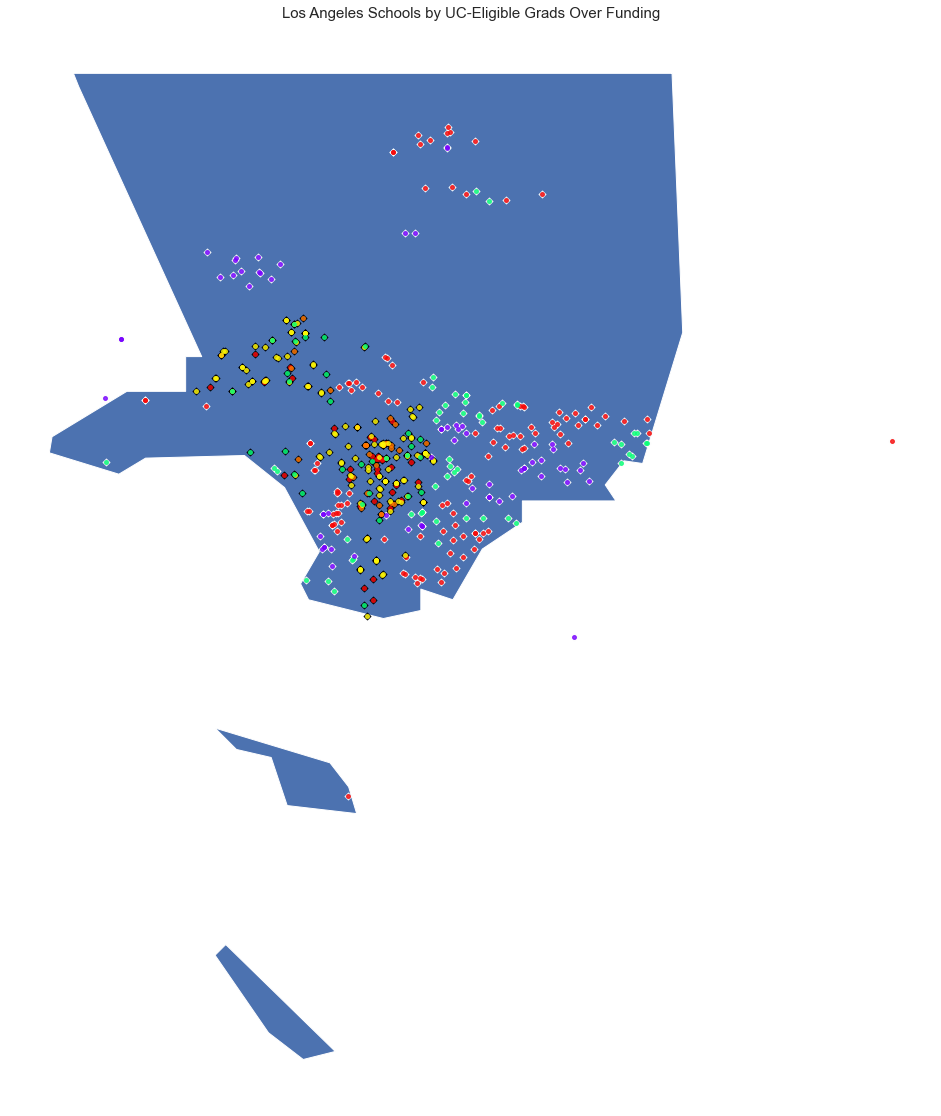

In [67]:
#Map everything
#red-purple is lowest-highest performing schools
#white-black is lowest-highest funded schools
#the marker are used to select the type pointers on the map plot (https://matplotlib.org/stable/api/markers_api.html)
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geocash20df.plot(ax=basemap, color='#FCFCFC', marker="D", markersize=25,alpha=0.8)
geocash40df.plot(ax=basemap, color='#BDBDBD', marker="D", markersize=25,alpha=0.8)
geocash60df.plot(ax=basemap, color='#7E7E7E', marker="D", markersize=25,alpha=0.8)
geocash80df.plot(ax=basemap, color='#3F3F3F', marker="D", markersize=25,alpha=0.8)
geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geouc40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geouc60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geouc80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Los Angeles Schools by UC-Eligible Grads Over Funding", fontsize=15, fontweight=3)

There are 2 types of markers used to understand the 2 different datasets apart. The cash and the eligibility data. The observation here is the highest performing schools 

(-119.0097, -117.5819, 32.69835, 34.92145)

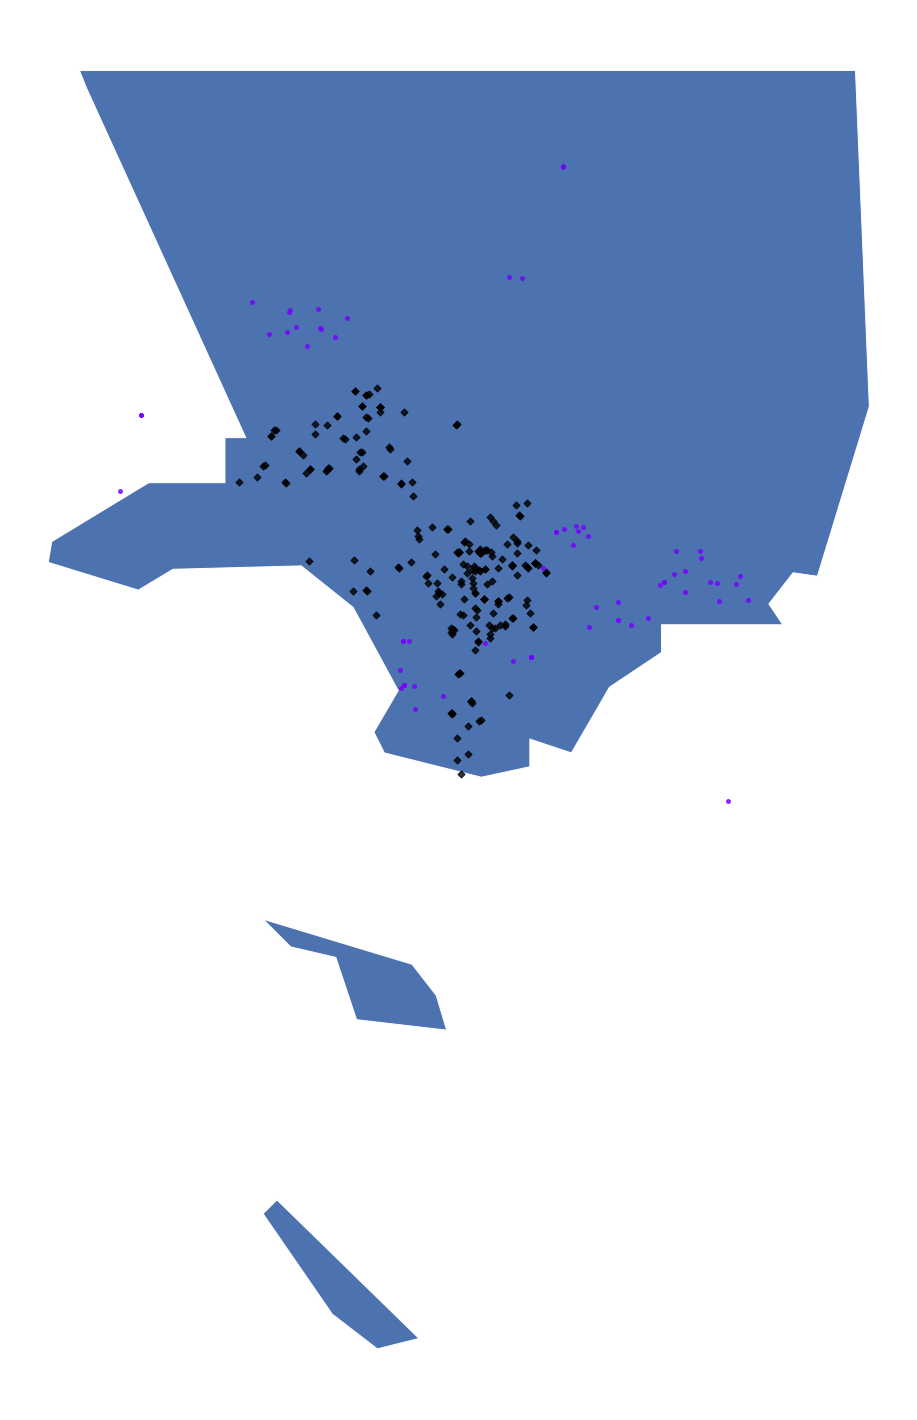

In [65]:
#Map of only the highest performing/funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)

geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')

In [ ]:
In the above plot it can be concluded that schools that are funded more not necessarily the schools that produce the eligible graduates.

In [227]:
lageo1 = lageo[lageo['UC-EligiblePercent'].notna()]
lageo1 = lageo[lageo['CPercent'].notna()]
lageo1


,CDSCode,School,Locations,binner,UC-EligiblePercent,CBin,CPercent
4040,19642120000000,No Data,POINT (-118.0725479125977 33.87898635864258),0-20%,16.666667,0-20%,4.080357
4041,19642121930056,Cerritos High,POINT (-118.0647888183594 33.86546325683594),0-20%,71.089109,0-20%,4.080357
4043,19642121930361,Artesia High,POINT (-118.0744018554688 33.84596252441406),0-20%,51.644737,0-20%,4.080357
4044,19642121931641,Tracy (Wilbur) High (Continuation),POINT (-118.0719909667969 33.87896728515625),0-20%,0.877193,0-20%,4.080357
4045,19642121931880,Whitney (Gretchen) High,POINT (-118.0551071166992 33.87899780273438),0-20%,99.378882,0-20%,4.080357
...,...,...,...,...,...,...,...
7260,19757131937697,San Gabriel High,POINT (-118.1080169677734 34.09192276000977),81-100%,63.940520,0-20%,3.381229
7261,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),81-100%,5.555556,0-20%,3.381229
7287,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,0.484725
7288,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,0.484725


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


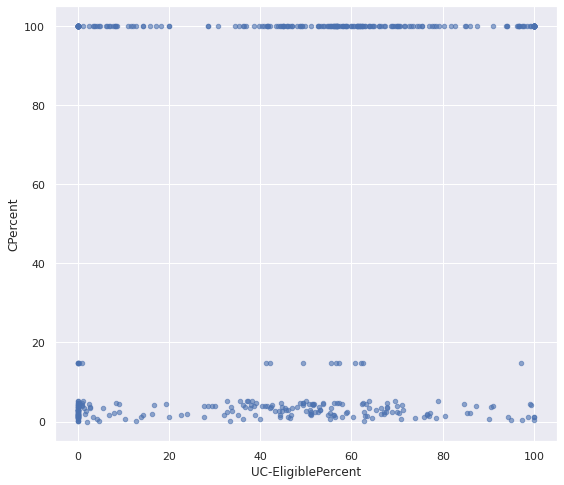

In [228]:
#Subplot of UC-EligiblePercent vs CPercent
lageo1.plot.scatter(x='UC-EligiblePercent', y='CPercent',  figsize=(9,8), alpha=0.6)

In [ ]:
The above scatter plot concludes that highest funded schools do not produce the highest number of eligible candidates.

Plots without outliers

In [229]:
#Remove outliers
lamoneydf=df9.loc[df9['Current Expense ADA'] != temp[-1]]
lamoneydf=lamoneydf.loc[lamoneydf['Current Expense ADA'] != temp[-2]]

In [230]:
#new minimum and maximum
min2=min(lamoneydf['Current Expense ADA'])
max2=max(lamoneydf['Current Expense ADA'])

In [231]:
#Set min value to 0 and max value to 100
minmax2=[]
for value in lamoneydf['Current Expense ADA']:
  mmm2=(value-min2)/(max2-min2)
  minmax2.append(mmm2*100)
print(minmax2)

[77.53211789705958, 76.91015535466627, 35.86354118510863, 32.142060751094554, 50.59255431974547, 13.279657823480736, 46.09888466304859, 14.710093974227986, 37.97568868463274, 56.68149379785634, 8.103266760161764, 23.081026063377248, 18.12474991356236, 26.0966703054648, 44.651937951369604, 25.221804817975922, 82.90605296587947, 12.436337219466147, 12.304602367420198, 32.677546802584196, 32.27193088096468, 32.779213009545046, 31.84362750620603, 12.676070564195005, 17.82398576595406, 97.30186355672447, 28.02743472501175, 0.0, 29.505421291242413, 4.828154196984589, 0.40643173757143247, 35.87706042088333, 9.504527778533165, 15.356259056528277, 51.557897681140275, 42.56531383662703, 20.254456880242106, 20.159006413867317, 16.296545213685505, 5.924222352580116, 11.546787044842684, 53.02675487838515, 20.506660554521762, 100.0, 25.865949784585744, 24.90635598323304, 67.82880296490825, 70.26684951303558, 42.6667469533159, 57.07996161780188, 62.78616686932571, 88.30034458511874, 9.288996973711303

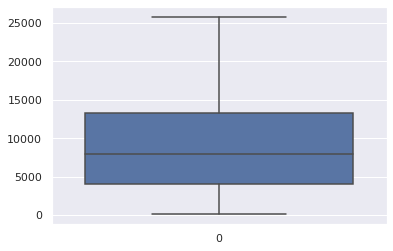

In [232]:
#New Boxplot of Current Expense ADA in LA
temp2=[]
for i in lamoneydf['Current Expense ADA']:
  temp2.append(i)
sns.boxplot(data=temp2)

The current majority expenses on funding in LA is in the bracket of 5000 - 15000.

In [233]:
#Calculating the mean,median
print("Mean: "+str(statistics.mean(temp2)))
print("Median: "+str(statistics.median(temp2)))
print("Min: "+str(min(temp2)))
print("Max: "+str(max(temp2)))

Mean: 9170.75282051282
Median: 7980.25
Min: 84.29
Max: 25825.39


In [234]:
#Adding the minmax values to the Dataframe
lamoneydf['scaled_CurrentExpenseAda']= minmax2

In [235]:
lamoneydf

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CurrentExpenseAda,scaled_bins_CurrentExpenseAda
245,19,64212,ABC Unified,2.086270e+08,20041.91,10409.536830,Unified,77.532118,0-20%
246,19,64246,Antelope Valley Union High,2.380238e+08,19881.81,11971.935759,High,76.910155,0-20%
247,19,64261,Arcadia Unified,9.599930e+07,9315.96,10304.820542,Unified,35.863541,0-20%
248,19,64279,Azusa Unified,1.081292e+08,8358.01,12937.189278,Unified,32.142061,0-20%
249,19,64287,Baldwin Park Unified,1.554206e+08,13107.37,11857.493834,Unified,50.592554,0-20%
...,...,...,...,...,...,...,...,...,...
320,19,75309,Acton-Agua Dulce Unified,1.474388e+07,1036.27,14227.833354,Unified,3.698288,0-20%
321,19,75333,Manhattan Beach Unified,7.253017e+07,6521.58,11121.564865,Unified,25.007828,0-20%
322,19,75341,Redondo Beach Unified,8.699906e+07,9406.06,9249.256217,Unified,36.213565,0-20%
323,19,75713,Alhambra Unified,1.913385e+08,16622.37,11510.903616,Unified,64.247759,0-20%


In [236]:
#Creating a dictionary of the minmax values with their percentage brackets
money_bins2=[]
for i in minmax2:
  if i<=20:
    money_bins2.append("0-20%")
  elif i<=40:
    money_bins2.append("21-40%")
  elif i<=60:
    money_bins2.append("41-60%")
  elif i<=80:
    money_bins2.append("61-80%")
  else:
    money_bins2.append("81-100%")
print(money_bins2)

['61-80%', '61-80%', '21-40%', '21-40%', '41-60%', '0-20%', '41-60%', '0-20%', '21-40%', '41-60%', '0-20%', '21-40%', '0-20%', '21-40%', '41-60%', '21-40%', '81-100%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '81-100%', '21-40%', '0-20%', '21-40%', '0-20%', '0-20%', '21-40%', '0-20%', '0-20%', '41-60%', '41-60%', '21-40%', '21-40%', '0-20%', '0-20%', '0-20%', '41-60%', '21-40%', '81-100%', '21-40%', '21-40%', '61-80%', '61-80%', '41-60%', '41-60%', '61-80%', '81-100%', '0-20%', '0-20%', '41-60%', '21-40%', '0-20%', '0-20%', '0-20%', '21-40%', '81-100%', '0-20%', '21-40%', '21-40%', '21-40%', '41-60%', '81-100%', '0-20%', '81-100%', '61-80%', '41-60%', '41-60%', '0-20%', '0-20%', '21-40%', '21-40%', '61-80%', '0-20%']


In [237]:
#replacing the values
lamoneydf['scaled_bins_CurrentExpenseAda'] = money_bins2

In [238]:
lamoneydf

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CurrentExpenseAda,scaled_bins_CurrentExpenseAda
245,19,64212,ABC Unified,2.086270e+08,20041.91,10409.536830,Unified,77.532118,61-80%
246,19,64246,Antelope Valley Union High,2.380238e+08,19881.81,11971.935759,High,76.910155,61-80%
247,19,64261,Arcadia Unified,9.599930e+07,9315.96,10304.820542,Unified,35.863541,21-40%
248,19,64279,Azusa Unified,1.081292e+08,8358.01,12937.189278,Unified,32.142061,21-40%
249,19,64287,Baldwin Park Unified,1.554206e+08,13107.37,11857.493834,Unified,50.592554,41-60%
...,...,...,...,...,...,...,...,...,...
320,19,75309,Acton-Agua Dulce Unified,1.474388e+07,1036.27,14227.833354,Unified,3.698288,0-20%
321,19,75333,Manhattan Beach Unified,7.253017e+07,6521.58,11121.564865,Unified,25.007828,21-40%
322,19,75341,Redondo Beach Unified,8.699906e+07,9406.06,9249.256217,Unified,36.213565,21-40%
323,19,75713,Alhambra Unified,1.913385e+08,16622.37,11510.903616,Unified,64.247759,61-80%


In [239]:
lamoneydf.loc[lamoneydf['CDS'] == 64519]

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CurrentExpenseAda,scaled_bins_CurrentExpenseAda
266,19,64519,El Monte Union High,1.112083e+08,8522.02,13049.521714,High,32.779213,21-40%


In [240]:
#Form a list that lines up the money rate with the correct CDS Code in the dataframe
cbin2=[]
cnobin2=[]
for k in lageo['CDSCode']:
  g=int(str(k)[2:7])
  t=0
  for h in lamoneydf['CDS']:
    if g==h:
      i=lamoneydf[lamoneydf['CDS']==h].index.item()
      cbin2.append(lamoneydf['scaled_bins_CurrentExpenseAda'][i])
      cnobin2.append(lamoneydf['scaled_CurrentExpenseAda'][i])
      t=1
  if t==0:
    cbin2.append(None)
    cnobin2.append(None)
print(cbin2)
print(cnobin2)

[None, None, None, None, None, None, None, None, None, '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '61-80%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '41-60%', '41-60%', '41-60%', '41-60%', '0-20%', '0-20%', '41-60%', '41-60%', '41-60%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '41-60%', '41-60%', '41-60%', '41-60%', '21-40%', '21-40%', '21-40%', '81-100%', '81-100%', '81-100%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '21-40%', '0-20%', '0-20%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '81-100%', '21-40%', '21-40%', '0-20%', '21-40%', '21-40%', '21-40%',

In [241]:
#dropping columns CBin and CPercentage
lageo2=lageo.drop(columns=['CBin','CPercent'])
lageo2.head(5)

,CDSCode,School,Locations,binner,UC-EligiblePercent
3598,19101990112128,Aspire Ollin University Preparatory Academy,POINT (-118.2265319824219 33.99015426635742),0-20%,100.0
3603,19101990121822,"Nidorf, Barry J.",POINT (-118.4841232299805 34.31448364257812),0-20%,0.0
3605,19101990121897,Central Juvenile Hall,POINT (-118.2058715820312 34.06349563598633),0-20%,0.0
3606,19101990121905,"Kirby, Dorothy Camp",POINT (-118.1701889038086 34.01198196411133),0-20%,0.0
3607,19101990121921,Afflerbaugh-Paige Camp,POINT (-117.742431640625 34.15207672119141),0-20%,0.0


In [242]:
#Add money rates as new columns in map dataframe
lageo2['CBin']=cbin2
lageo2['CPercent']=cnobin2
lageo2

,CDSCode,School,Locations,binner,UC-EligiblePercent,CBin,CPercent
3598,19101990112128,Aspire Ollin University Preparatory Academy,POINT (-118.2265319824219 33.99015426635742),0-20%,100.000000,None,NaN
3603,19101990121822,"Nidorf, Barry J.",POINT (-118.4841232299805 34.31448364257812),0-20%,0.000000,None,NaN
3605,19101990121897,Central Juvenile Hall,POINT (-118.2058715820312 34.06349563598633),0-20%,0.000000,None,NaN
3606,19101990121905,"Kirby, Dorothy Camp",POINT (-118.1701889038086 34.01198196411133),0-20%,0.000000,None,NaN
3607,19101990121921,Afflerbaugh-Paige Camp,POINT (-117.742431640625 34.15207672119141),0-20%,0.000000,None,NaN
...,...,...,...,...,...,...,...
7261,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),81-100%,5.555556,61-80%,64.247759
7287,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,9.210407
7288,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,9.210407
7290,19768690131128,Da Vinci Communications,POINT (-118.3839797973633 33.91777420043945),81-100%,100.000000,0-20%,9.210407


In [243]:
#remove null values from CBin
lageo3 = lageo2[lageo2['CBin'].notna()]
lageo3.head()

,CDSCode,School,Locations,binner,UC-EligiblePercent,CBin,CPercent
4040,19642120000000,No Data,POINT (-118.0725479125977 33.87898635864258),0-20%,16.666667,61-80%,77.532118
4041,19642121930056,Cerritos High,POINT (-118.0647888183594 33.86546325683594),0-20%,71.089109,61-80%,77.532118
4043,19642121930361,Artesia High,POINT (-118.0744018554688 33.84596252441406),0-20%,51.644737,61-80%,77.532118
4044,19642121931641,Tracy (Wilbur) High (Continuation),POINT (-118.0719909667969 33.87896728515625),0-20%,0.877193,61-80%,77.532118
4045,19642121931880,Whitney (Gretchen) High,POINT (-118.0551071166992 33.87899780273438),0-20%,99.378882,61-80%,77.532118


In [244]:
#Set each category to its own dataframe by percentage of uc-eligible grads/funding
tgeouc20=lageo3.loc[lageo3['binner'] == '0-20%']
tgeouc40=lageo3.loc[lageo3['binner'] == '21-40%']
tgeouc60=lageo3.loc[lageo3['binner'] == '41-60%']
tgeouc80=lageo3.loc[lageo3['binner'] == '61-80%']
tgeouc100=lageo3.loc[lageo3['binner'] == '81-100%']
tgeocash20=lageo3.loc[lageo3['CBin'] == '0-20%']
tgeocash40=lageo3.loc[lageo3['CBin'] == '21-40%']
tgeocash60=lageo3.loc[lageo3['CBin'] == '41-60%']
tgeocash80=lageo3.loc[lageo3['CBin'] == '61-80%']
tgeocash100=lageo3.loc[lageo3['CBin'] == '81-100%']

In [245]:
#Make previous dataframes mapable
geouc20df2 = gpd.GeoDataFrame(tgeouc20, geometry='Locations')
geouc40df2= gpd.GeoDataFrame(tgeouc40, geometry='Locations')
geouc60df2 = gpd.GeoDataFrame(tgeouc60, geometry='Locations')
geouc80df2 = gpd.GeoDataFrame(tgeouc80, geometry='Locations')
geouc100df2 = gpd.GeoDataFrame(tgeouc100, geometry='Locations')
geocash20df2 = gpd.GeoDataFrame(tgeocash20, geometry='Locations')
geocash40df2 = gpd.GeoDataFrame(tgeocash40, geometry='Locations')
geocash60df2 = gpd.GeoDataFrame(tgeocash60, geometry='Locations')
geocash80df2 = gpd.GeoDataFrame(tgeocash80, geometry='Locations')
geocash100df2 = gpd.GeoDataFrame(tgeocash100, geometry='Locations')

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


Text(0.5, 1.0, 'Los Angeles Schools by UC-Eligible Grads Over Funding')

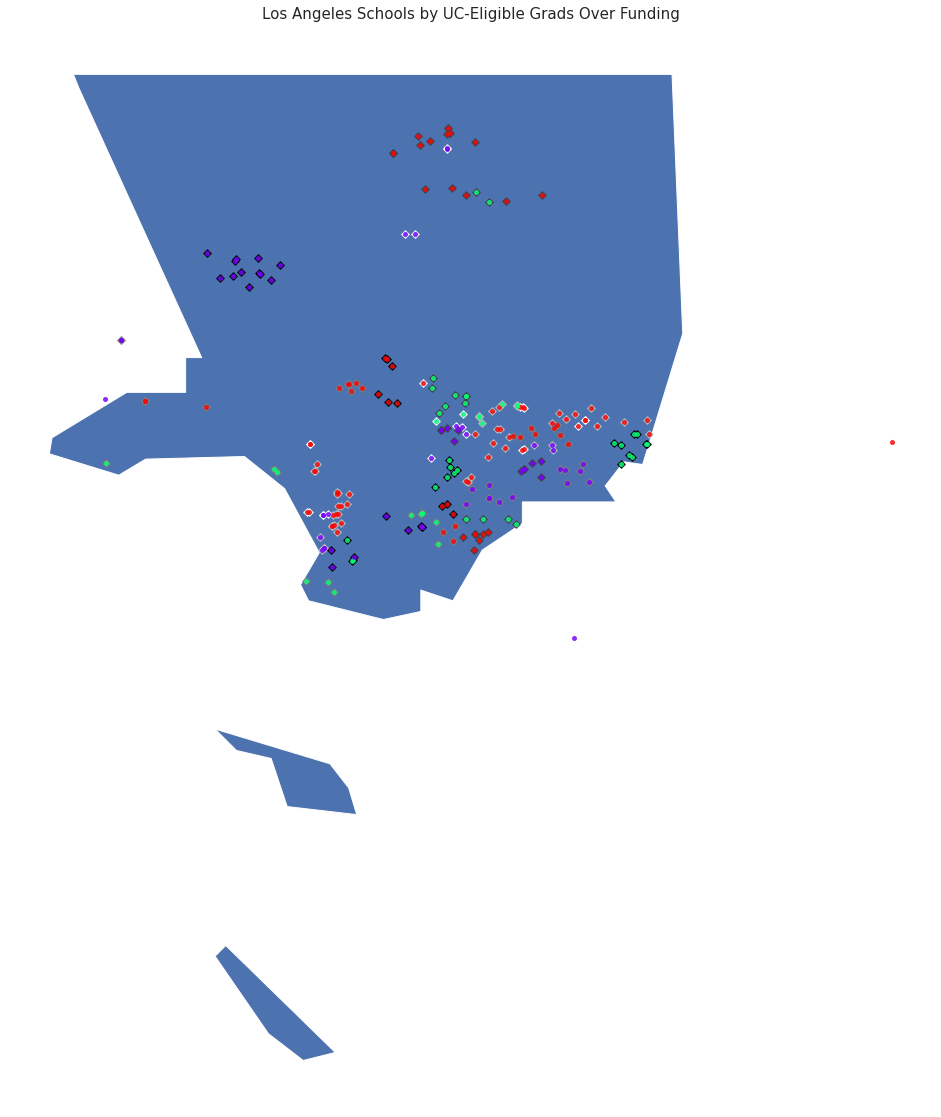

In [246]:
#Map everything
#red-purple is lowest-highest performing schools
#white-black is lowest-highest funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geocash20df2.plot(ax=basemap, color='#FCFCFC', marker="D", markersize=30,alpha=0.8)
geocash40df2.plot(ax=basemap, color='#BDBDBD', marker="D", markersize=30,alpha=0.8)
geocash60df2.plot(ax=basemap, color='#7E7E7E', marker="D", markersize=30,alpha=0.8)
geocash80df2.plot(ax=basemap, color='#3F3F3F', marker="D", markersize=30,alpha=0.8)
geocash100df2.plot(ax=basemap, color='#000000', marker="D", markersize=30,alpha=0.8)
geouc20df2.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geouc40df2.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geouc60df2.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geouc80df2.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geouc100df2.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Los Angeles Schools by UC-Eligible Grads Over Funding", fontsize=15, fontweight=3)

In [ ]:
Once we remove the outliers we have a clear picture of the funded and the performance oriented schools.

(-119.0097, -117.5819, 32.69835, 34.92145)

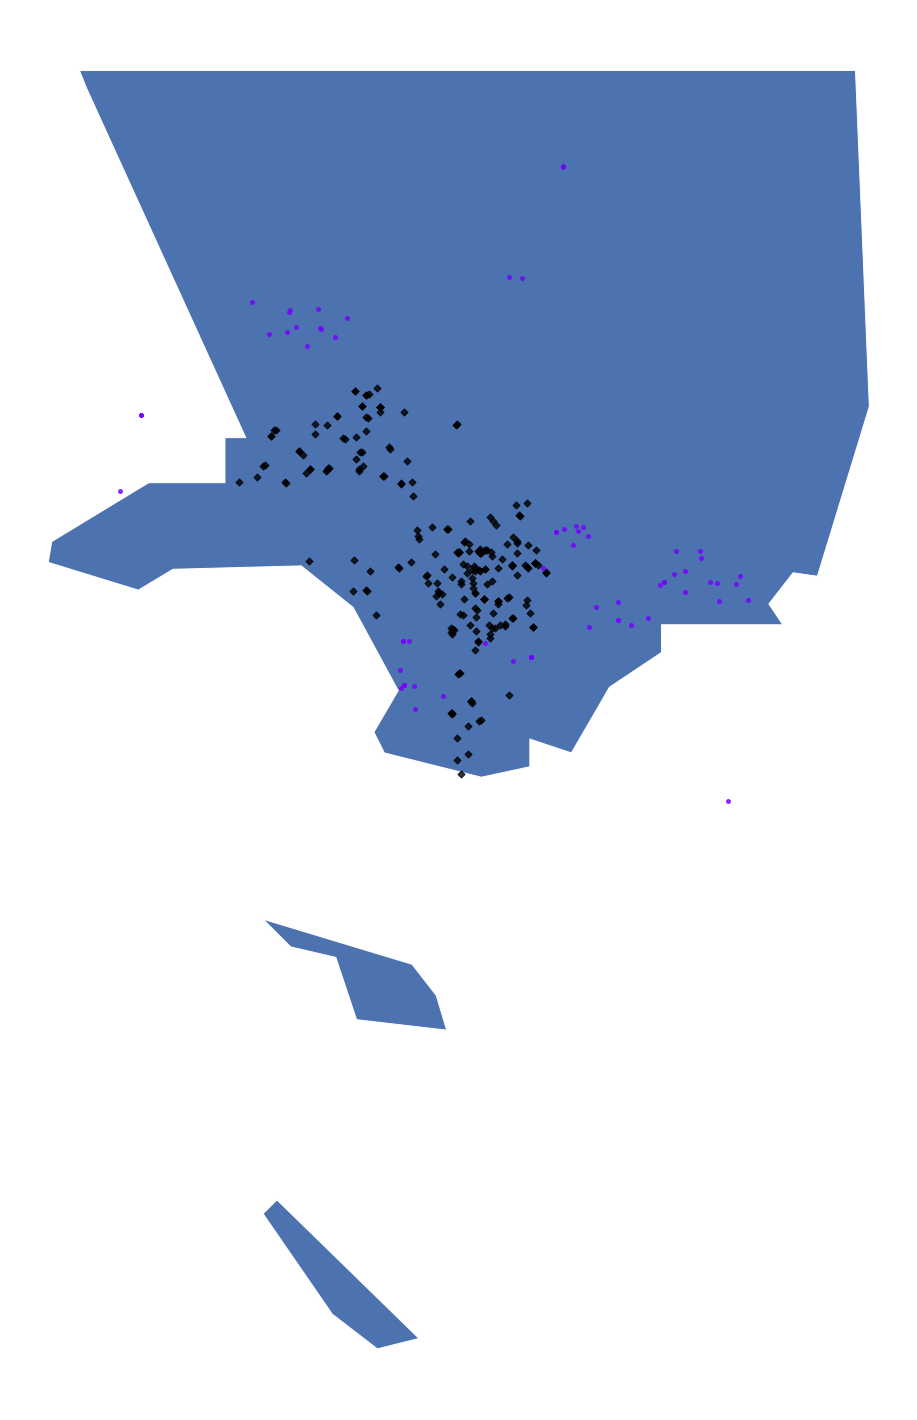

In [247]:
#Map of only the highest performing/funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)

geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')

In [248]:
lageo4 = lageo3[lageo3['UC-EligiblePercent'].notna()]
lageo4 = lageo3[lageo3['CPercent'].notna()]
lageo4

,CDSCode,School,Locations,binner,UC-EligiblePercent,CBin,CPercent
4040,19642120000000,No Data,POINT (-118.0725479125977 33.87898635864258),0-20%,16.666667,61-80%,77.532118
4041,19642121930056,Cerritos High,POINT (-118.0647888183594 33.86546325683594),0-20%,71.089109,61-80%,77.532118
4043,19642121930361,Artesia High,POINT (-118.0744018554688 33.84596252441406),0-20%,51.644737,61-80%,77.532118
4044,19642121931641,Tracy (Wilbur) High (Continuation),POINT (-118.0719909667969 33.87896728515625),0-20%,0.877193,61-80%,77.532118
4045,19642121931880,Whitney (Gretchen) High,POINT (-118.0551071166992 33.87899780273438),0-20%,99.378882,61-80%,77.532118
...,...,...,...,...,...,...,...
7260,19757131937697,San Gabriel High,POINT (-118.1080169677734 34.09192276000977),81-100%,63.940520,61-80%,64.247759
7261,19757131995430,Independence High (Alternative),POINT (-118.1419372558594 34.09123611450195),81-100%,5.555556,61-80%,64.247759
7287,19768690119016,Da Vinci Science,POINT (-118.3840789794922 33.91790771484375),81-100%,94.871795,0-20%,9.210407
7288,19768690119636,Da Vinci Design,POINT (-118.374382019043 33.91906356811523),81-100%,97.297297,0-20%,9.210407


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


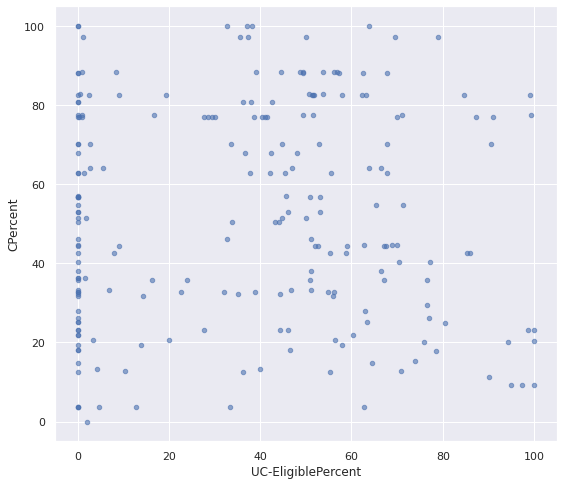

In [249]:
lageo4.plot.scatter(x='UC-EligiblePercent', y='CPercent',  figsize=(9,8), alpha=0.6)

In [ ]:
The scatter plot puts forth an observation that it is not necessary that less funded schools perform better or higher funded schools perform better. It can be either of the case.

**Lake County**

In [260]:
#Make a dataframe with only Lake County schools (Lake county code is 17; the first two digits of the CDS Code)
df10=df1.loc[df1['CDS_CODE'] >= 17000000000000]
df10=df1.loc[df1['CDS_CODE'] < 18000000000000]
df10


,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170112607,5,M,18,18,1617
1,1100170112607,5,F,19,19,1617
2,1100170112607,2,M,1,1,1617
3,1100170112607,6,M,11,11,1617
4,1100170112607,7,M,4,4,1617
...,...,...,...,...,...,...
3831,17769761737006,9,F,5,2,1617
3832,17769761737006,9,M,1,0,1617
3833,17769761737006,7,M,8,1,1617
3834,17769761737006,5,M,7,4,1617


In [261]:
df10.tail(3)

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
3833,17769761737006,7,M,8,1,1617
3834,17769761737006,5,M,7,4,1617
3835,17769761737006,1,F,2,1,1617


In [262]:
#make a list of schools and lists of the percentage of students who graduated UC-eligible
sch=df10['CDS_CODE'][3746]
code=[]
rate=[]
rate1=[]
grad=0
ucgrad=0
for i in range(3746,3835):
  if df10['CDS_CODE'][i]==sch:
    grad+=df10['GRADS'][i]
    ucgrad+=df10['UC_GRADS'][i]
  else:
    code.append(sch)
    if grad==0:
      rate.append(0)
      rate1.append(0)
    else:
      rate.append(100*ucgrad/grad)
      rate1.append(100*ucgrad/grad)
    sch=df10['CDS_CODE'][i]
    grad=df10['GRADS'][i]
    ucgrad=df10['UC_GRADS'][i]
  if i==3835:
    code.append(sch)
    rate.append(100*ucgrad/grad)
    rate1.append(100*ucgrad/grad)

In [263]:
#cds codes for each high school in Lake County
code

[17101731730167,
 17640141730043,
 17640141730159,
 17640141734359,
 17640220000001,
 17640220132571,
 17640221730027,
 17640221730118,
 17640221735000,
 17640301730019,
 17640301730142,
 17640301732304,
 17640550129601,
 17640551730035,
 17640551736008,
 17769761730050]

In [264]:
#percent of UC-eligible graduates
rate

[0.0,
 0.0,
 0.0,
 21.73913043478261,
 0.0,
 23.076923076923077,
 0.0,
 0.0,
 25.471698113207548,
 0.0,
 0.0,
 45.348837209302324,
 46.666666666666664,
 0.0,
 34.65346534653465,
 0.0]

<AxesSubplot:>

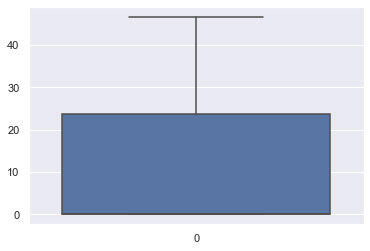

In [265]:
#boxplot of the UC-eligible gradute rate
sns.boxplot(data=rate)

In [266]:
#statistics
print("Mean: "+str(statistics.mean(rate)))
print("Median: "+str(statistics.median(rate)))
print("Mode: "+str(statistics.mode(rate)))
print("Min: "+str(min(rate)))
print("Max: "+str(max(rate)))

Mean: 12.309795052963555
Median: 0.0
Mode: 0.0
Min: 0.0
Max: 46.666666666666664


In [267]:
binrate1=[]
rate1.sort()
for i in rate1:
  if i<=20:
    binrate1.append("0-20%")
  elif i<=40:
    binrate1.append("21-40%")
  elif i<=60:
    binrate1.append("41-60%")
  elif i<=80:
    binrate1.append("61-80%")
  else:
    binrate1.append("81-100%")
print(binrate1)

['0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '0-20%', '21-40%', '21-40%', '21-40%', '21-40%', '41-60%', '41-60%']


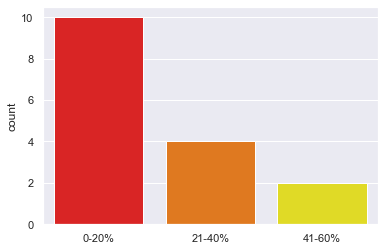

In [268]:
#number of schools that fall into each percent range of UC-eligible graduates
import seaborn as sns

sns.set_theme(style="darkgrid")

gradecolor=['#F70707','#FF7700','#FFF707','#07FF77','#7700FF']

ax = sns.countplot(x=binrate1, palette=gradecolor)

The rank 5 schools count is the highest.

In [269]:
binrate=[]
for i in rate:
  if i<=20:
    binrate.append("0-20%")
  elif i<=40:
    binrate.append("21-40%")
  elif i<=60:
    binrate.append("41-60%")
  elif i<=80:
    binrate.append("61-80%")
  else:
    binrate.append("81-100%")
print(binrate)

['0-20%', '0-20%', '0-20%', '21-40%', '0-20%', '21-40%', '0-20%', '0-20%', '21-40%', '0-20%', '0-20%', '41-60%', '41-60%', '0-20%', '21-40%', '0-20%']


In [287]:
#Make sure to only include schools that are active and have geographic coordinates
df8=df6[df6.StatusType == 'Active']
df8=df8[df6.County=='Lake']
df8 = df8.loc[(df8['Latitude'].notnull()) & df8['Longitude'].notnull()]

df8.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Virtual,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate
3437,17101730000000,0691014,No Data,Active,Lake,Lake County Office of Education,No Data,1152 South Main Street,1152 South Main St.,Lakeport,...,No Data,No Data,No Data,No Data,39.028703,-122.91600,Brock,Falkenberg,bfalkenberg@lakecoe.org,06/03/2021
3441,17101730128231,0691014,13724,Active,Lake,Lake County Office of Education,Clearlake Creativity,6945 Old Highway 53,6945 Old Highway 53,Clearlake,...,N,N,N,No Data,38.932891,-122.62444,Shelley,Tan,stan@lakecoe.org,08/18/2020
3442,17101731730068,0691014,07934,Active,Lake,Lake County Office of Education,Renaissance Court,1111 Whalen Way,1111 Whalen Way,Lakeport,...,N,N,Y,No Data,39.111728,-122.90840,Cynthia,Lenners,clenners@lakecoe.org,03/21/2019


In [288]:
#Make sure the longitude and latitude are float types
df8=df8.loc[df8['Longitude']!="No Data"]
df8["Longitude"] = pd.to_numeric(df8["Longitude"], downcast="float")
df8["Latitude"] = pd.to_numeric(df8["Latitude"], downcast="float")

In [289]:
#Create a new column combining longitude and latitude to make it geo-conversion friendly
df8['coordinates'] = list(df8[['Longitude', 'Latitude']].values)
df8.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
3437,17101730000000,0691014,No Data,Active,Lake,Lake County Office of Education,No Data,1152 South Main Street,1152 South Main St.,Lakeport,...,No Data,No Data,No Data,39.028702,-122.916000,Brock,Falkenberg,bfalkenberg@lakecoe.org,06/03/2021,"[-122.916, 39.0287]"
3441,17101730128231,0691014,13724,Active,Lake,Lake County Office of Education,Clearlake Creativity,6945 Old Highway 53,6945 Old Highway 53,Clearlake,...,N,N,No Data,38.932892,-122.624443,Shelley,Tan,stan@lakecoe.org,08/18/2020,"[-122.62444, 38.93289]"
3442,17101731730068,0691014,07934,Active,Lake,Lake County Office of Education,Renaissance Court,1111 Whalen Way,1111 Whalen Way,Lakeport,...,N,Y,No Data,39.111729,-122.908401,Cynthia,Lenners,clenners@lakecoe.org,03/21/2019,"[-122.9084, 39.11173]"


In [290]:
#Making coordinates into geo-readable points
df8['coordinates'] = df8['coordinates'].apply(Point)

In [291]:
df8.head(3)

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,Magnet,YearRoundYN,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates
3437,17101730000000,0691014,No Data,Active,Lake,Lake County Office of Education,No Data,1152 South Main Street,1152 South Main St.,Lakeport,...,No Data,No Data,No Data,39.028702,-122.916000,Brock,Falkenberg,bfalkenberg@lakecoe.org,06/03/2021,POINT (-122.9160003662109 39.02870178222656)
3441,17101730128231,0691014,13724,Active,Lake,Lake County Office of Education,Clearlake Creativity,6945 Old Highway 53,6945 Old Highway 53,Clearlake,...,N,N,No Data,38.932892,-122.624443,Shelley,Tan,stan@lakecoe.org,08/18/2020,POINT (-122.6244430541992 38.93289184570312)
3442,17101731730068,0691014,07934,Active,Lake,Lake County Office of Education,Renaissance Court,1111 Whalen Way,1111 Whalen Way,Lakeport,...,N,Y,No Data,39.111729,-122.908401,Cynthia,Lenners,clenners@lakecoe.org,03/21/2019,POINT (-122.9084014892578 39.11172866821289)


In [292]:
#Form a list that lines up the percentage of UC-eligible graduates with the correct CDS Code in the dataframe
pointer=[]
nonbin=[]
for k in df8['CDSCode']:
  if k in code:
    i=code.index(k)
    pointer.append(binrate[i])
    nonbin.append(rate[i])
  else:
    pointer.append(None)
    nonbin.append(None)
print(pointer)
print(nonbin)

[None, None, None, '0-20%', None, None, None, '0-20%', '0-20%', '21-40%', None, None, None, None, None, None, '21-40%', '0-20%', None, '0-20%', '21-40%', None, None, None, None, None, None, None, '0-20%', '0-20%', '41-60%', None, None, None, None, None, None, '41-60%', '0-20%', None, '21-40%', None, None, None, None, None, None, None, None, '0-20%', None, None, None, None]
[None, None, None, 0.0, None, None, None, 0.0, 0.0, 21.73913043478261, None, None, None, None, None, None, 23.076923076923077, 0.0, None, 0.0, 25.471698113207548, None, None, None, None, None, None, None, 0.0, 0.0, 45.348837209302324, None, None, None, None, None, None, 46.666666666666664, 0.0, None, 34.65346534653465, None, None, None, None, None, None, None, None, 0.0, None, None, None, None]


In [293]:
#Create a new column with the list of lined up UC-eligible graduate percentages
df8['binner']=pointer
df8['UC-EligiblePercent']=nonbin
df8.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
3437,17101730000000,0691014,No Data,Active,Lake,Lake County Office of Education,No Data,1152 South Main Street,1152 South Main St.,Lakeport,...,No Data,39.028702,-122.916000,Brock,Falkenberg,bfalkenberg@lakecoe.org,06/03/2021,POINT (-122.9160003662109 39.02870178222656),None,NaN
3441,17101730128231,0691014,13724,Active,Lake,Lake County Office of Education,Clearlake Creativity,6945 Old Highway 53,6945 Old Highway 53,Clearlake,...,No Data,38.932892,-122.624443,Shelley,Tan,stan@lakecoe.org,08/18/2020,POINT (-122.6244430541992 38.93289184570312),None,NaN
3442,17101731730068,0691014,07934,Active,Lake,Lake County Office of Education,Renaissance Court,1111 Whalen Way,1111 Whalen Way,Lakeport,...,No Data,39.111729,-122.908401,Cynthia,Lenners,clenners@lakecoe.org,03/21/2019,POINT (-122.9084014892578 39.11172866821289),None,NaN
3443,17101731730167,0691014,10510,Active,Lake,Lake County Office of Education,Lloyd Hance Community,1510 Argonaut Road,1510 Argonaut Rd.,Lakeport,...,No Data,38.995014,-122.884048,Bill,Roderick,broderick@lakecoe.org,10/15/2021,POINT (-122.8840484619141 38.99501419067383),0-20%,0.0
3447,17640140000000,0619320,No Data,Active,Lake,Kelseyville Unified,No Data,4410 Konocti Road,4410 Konocti Rd.,Kelseyville,...,No Data,38.975601,-122.831169,David,McQueen,davem@kvusd.org,08/05/2020,POINT (-122.831169128418 38.97560119628906),None,NaN


In [294]:
#Remove rows with null values in the UC-eligible percentage column from dataframe (gets rid of elementary and middle schools)
df8 = df8[df8['binner'].notna()]
df8.head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,FederalDFCDistrictID,Latitude,Longitude,AdmFName,AdmLName,AdmEmail,LastUpDate,coordinates,binner,UC-EligiblePercent
3443,17101731730167,0691014,10510,Active,Lake,Lake County Office of Education,Lloyd Hance Community,1510 Argonaut Road,1510 Argonaut Rd.,Lakeport,...,No Data,38.995014,-122.884048,Bill,Roderick,broderick@lakecoe.org,10/15/2021,POINT (-122.8840484619141 38.99501419067383),0-20%,0.000000
3453,17640141730043,0619320,02323,Active,Lake,Kelseyville Unified,Ed Donaldson Education Center,4500 Konocti Road,4500 Konocti Rd.,Kelseyville,...,No Data,38.977962,-122.827812,Nicki,Thomas,nthomas@kvusd.org,11/04/2021,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000
3455,17640141730159,0619320,10511,Active,Lake,Kelseyville Unified,Kelseyville Community Day,3980 Gard Street,3980 Gard St.,Kelseyville,...,No Data,38.979809,-122.839058,Nicki,Thomas,nthomas@kvusd.org,11/04/2021,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000
3456,17640141734359,0619320,02325,Active,Lake,Kelseyville Unified,Kelseyville High,5480 Main Street,5480 Main St.,Kelseyville,...,No Data,38.972481,-122.830177,Mike,Jones,mikej@kvusd.org,08/13/2020,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130
3467,17640220132571,0620070,13894,Active,Lake,Konocti Unified,Konocti Education Center,15850-A Dam Road Extention,15850-A Dam Road Extention,Clearlake,...,No Data,38.933830,-122.615471,Ami,Barker,ami.barker@konoctiusd.org,08/13/2020,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923


In [295]:
#Taken from https://github.com/johan/world.geo.json/blob/master/countries/USA/CA/Lake.geo.json
map_df = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/CA/Lake.geo.json")
map_df.head()

,kind,name,state,geometry
0,county,Lake,CA,"MULTIPOLYGON (((-122.88270 39.57990, -122.7349..."


<AxesSubplot:>

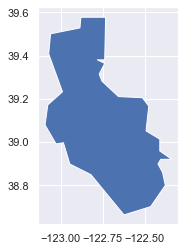

In [296]:
map_df.plot()

In [297]:
#Form smaller dataframe with more relevant information
lageo=df8[['CDSCode','School', 'coordinates', 'binner','UC-EligiblePercent']]
lageo.head()

,CDSCode,School,coordinates,binner,UC-EligiblePercent
3443,17101731730167,Lloyd Hance Community,POINT (-122.8840484619141 38.99501419067383),0-20%,0.000000
3453,17640141730043,Ed Donaldson Education Center,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000
3455,17640141730159,Kelseyville Community Day,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000
3456,17640141734359,Kelseyville High,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130
3467,17640220132571,Konocti Education Center,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923


In [104]:
#Split dataframe into smaller dataframes according to percentages
lageo20=lageo.loc[lageo['binner'] == '0-20%']
lageo40=lageo.loc[lageo['binner'] == '21-40%']
lageo60=lageo.loc[lageo['binner'] == '41-60%']
lageo80=lageo.loc[lageo['binner'] == '61-80%']
lageo100=lageo.loc[lageo['binner'] == '81-100%']

In [105]:
#Make mapable
geola20df = gpd.GeoDataFrame(lageo20, geometry='coordinates')
geola40df = gpd.GeoDataFrame(lageo40, geometry='coordinates')
geola60df = gpd.GeoDataFrame(lageo60, geometry='coordinates')
geola80df = gpd.GeoDataFrame(lageo80, geometry='coordinates')
geola100df = gpd.GeoDataFrame(lageo100, geometry='coordinates')

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

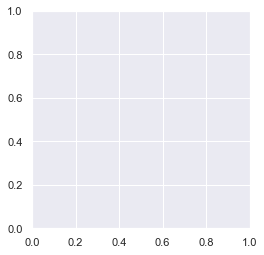

In [106]:
#Rank 1 schools
geola100df.plot(color='#7700FF')

There are no rank 1 schools in Lake county.i.e no active schools with 81-100% eligibility exist.

<AxesSubplot:>

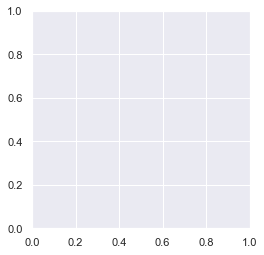

In [107]:
#Rank 2 schools
geola80df.plot(color='#07FF77')

There are no rank 2 schools in Lake county.i.e no active schools with 61-80% eligibility exist.

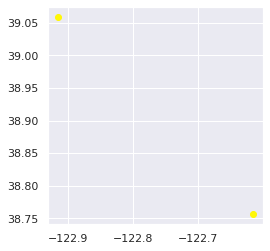

In [304]:
#Rank 3 schools
geola60df.plot(color='#FFF707')

There are only a few rank 3 schools in Lake county.i.e amongst active schools with 41-60% eligibility exist.

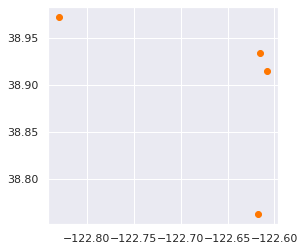

In [305]:
#Rank 4 schools
geola40df.plot(color='#FF7700')

The count for rank 4 schools in Lake county is a little higher.i.e amongst active schools with 21-40% eligibility exist.

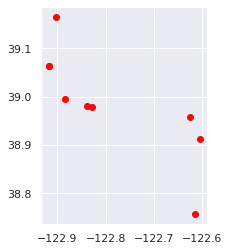

In [306]:
#Rank 5 schools
geola20df.plot(color='#F70707')

The count for rank 5 schools in Lake county is the highest.i.e amongst active schools with 0-20% eligibility exist.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


Text(0.5, 1.0, 'Lake County Schools by UC-Eligible Grads')

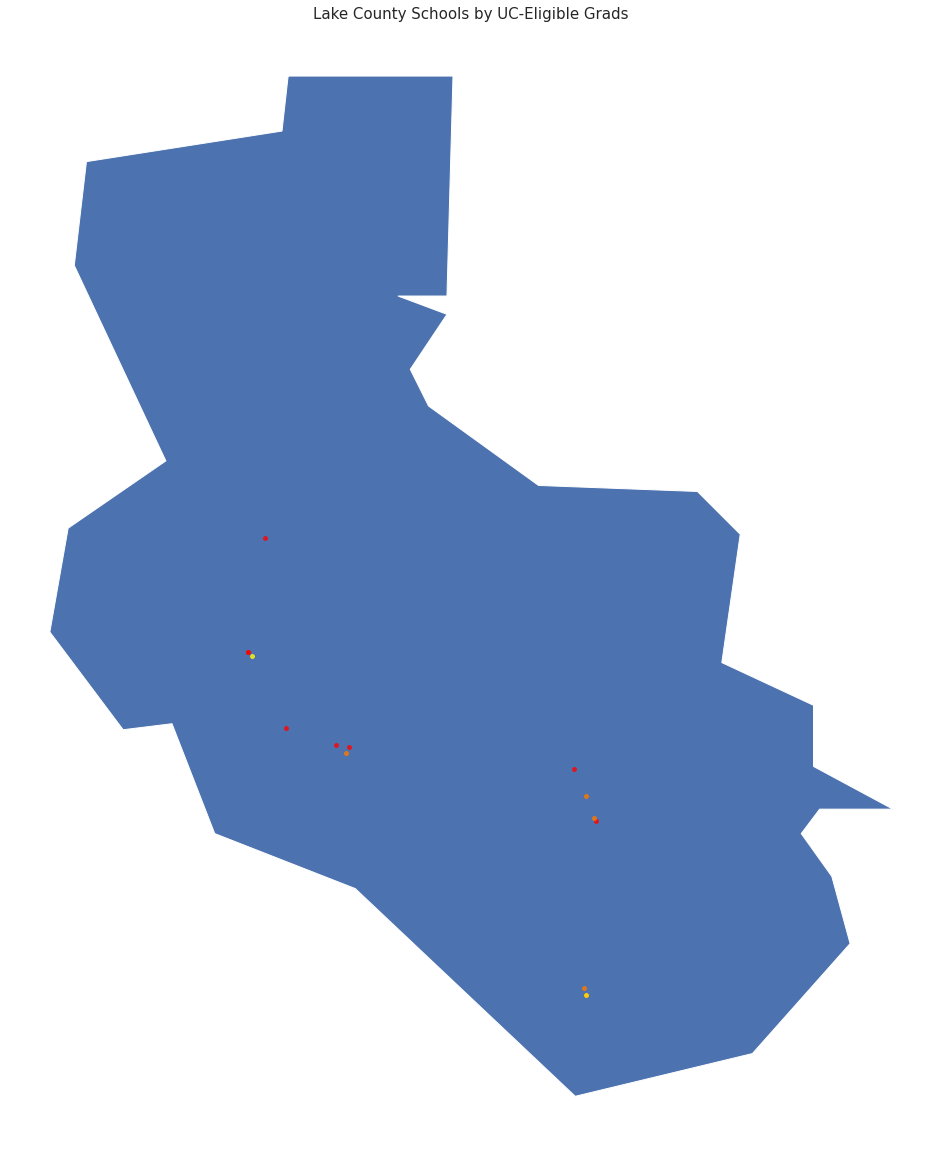

In [330]:
#Plot schools over map of Lake County color-coded by percentage of UC-eligible students
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)
geola20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geola40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geola60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geola80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geola100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Lake County Schools by UC-Eligible Grads", fontsize=15, fontweight=3)


The observation for the above map plot is the same observation as for the above scatter plots. 

**Money Data Analysis**

In [301]:
#from https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp Current Expense per Average Daily Attendance

mURL="https://www.cde.ca.gov/ds/fd/ec/documents/currentexpense1617.xlsx"
moneydf = pd.read_excel(mURL,skiprows=[0,1,2,3,4,5,6,7]) #first few rows contained description of data, not data itself
moneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
0,1,61119,Alameda Unified,1.048464e+08,9061.77,11570.193309,Unified
1,1,61127,Albany City Unified,4.381278e+07,3601.47,12165.247807,Unified
2,1,61143,Berkeley Unified,1.421931e+08,9171.43,15503.921472,Unified
3,1,61150,Castro Valley Unified,9.131184e+07,9022.97,10119.931991,Unified
4,1,61168,Emery Unified,1.102028e+07,644.25,17105.601024,Unified


In [302]:
#Make dataframe of only Lake County school districts
lakemoneydf=moneydf.loc[moneydf['CO'] == 17]
lakemoneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type
229,17,64014,Kelseyville Unified,18888787.12,1568.96,12039.049511,Unified
230,17,64022,Konocti Unified,38964701.53,3026.70,12873.658285,Unified
231,17,64030,Lakeport Unified,15694759.10,1452.48,10805.490678,Unified
232,17,64048,Lucerne Elementary,2869421.17,242.21,11846.831964,Elementary
233,17,64055,Middletown Unified,16690978.75,1376.34,12127.075250,Unified


Text(0.5, 1.0, 'Current Expenses for Lake County')

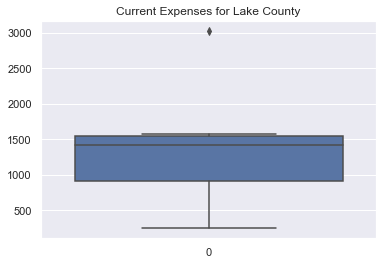

In [303]:
#Boxplot of Current Expense ADA in LA
temp=[]
for i in lakemoneydf['Current Expense ADA']:
  temp.append(i)
sns.boxplot(data=temp).set_title("Current Expenses for Lake County")

The Current expenses for Lake County range in between 500 - 1500 with certain instituions at 2000 or 3000.

In [304]:
#Statistics
print("Mean: "+str(statistics.mean(temp)))
print("Median: "+str(statistics.median(temp)))
#print("Mode: "+str(statistics.mode(temp))) No mode
print("Min: "+str(min(temp)))
print("Max: "+str(max(temp)))

Mean: 1402.7183333333332
Median: 1414.4099999999999
Min: 242.21
Max: 3026.7


In [305]:
#Identify outlier
temp.sort()
print(temp[-1])

3026.7


Scaling (Min-Max)

In [306]:
#Finding the minimum Maximum Expenses
minmoney=min(lakemoneydf['Current Expense ADA'])
maxmoney=max(lakemoneydf['Current Expense ADA'])

In [307]:
#Calculating and printing the vminmax values
minmaxmoney=[]
for value in lakemoneydf['Current Expense ADA']:
  mmm=(value-minmoney)/(maxmoney-minmoney)
  minmaxmoney.append(mmm*100)
print(minmaxmoney)

[47.647863702150126, 100.0, 43.46469191844826, 0.0, 40.73025940118298, 18.22272660343546]


In [308]:
lakemoneydf['scaled_CAEDA']=minmaxmoney

<ipython-input-308-ca7fc9441d94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lakemoneydf['scaled_CAEDA']=minmaxmoney


In [309]:

moneybins=[]
for i in minmaxmoney:
  if i<=20:
    moneybins.append("0-20%")
  elif i<=40:
    moneybins.append("21-40%")
  elif i<=60:
    moneybins.append("41-60%")
  elif i<=80:
    moneybins.append("61-80%")
  else:
    moneybins.append("81-100%")
print(moneybins)

['41-60%', '81-100%', '41-60%', '0-20%', '41-60%', '0-20%']


In [310]:
lakemoneydf['scaled_bins_CAEDA'] = moneybins

<ipython-input-310-42b107db6fe3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lakemoneydf['scaled_bins_CAEDA'] = moneybins


In [311]:
lakemoneydf.head()

,CO,CDS,DISTRICT,EDP 365,Current Expense ADA,Current Expense Per ADA,LEA Type,scaled_CAEDA,scaled_bins_CAEDA
229,17,64014,Kelseyville Unified,18888787.12,1568.96,12039.049511,Unified,47.647864,41-60%
230,17,64022,Konocti Unified,38964701.53,3026.70,12873.658285,Unified,100.000000,81-100%
231,17,64030,Lakeport Unified,15694759.10,1452.48,10805.490678,Unified,43.464692,41-60%
232,17,64048,Lucerne Elementary,2869421.17,242.21,11846.831964,Elementary,0.000000,0-20%
233,17,64055,Middletown Unified,16690978.75,1376.34,12127.075250,Unified,40.730259,41-60%


In [312]:
#Form a list that lines up the money rate with the correct CDS Code in the dataframe
cashbin=[]
cashnobin=[]
for k in lageo['CDSCode']:
  g=int(str(k)[2:7])
  t=0
  for h in lakemoneydf['CDS']:
    if g==h:
      i=lakemoneydf[lakemoneydf['CDS']==h].index.item()
      cashbin.append(lakemoneydf['scaled_bins_CAEDA'][i])
      cashnobin.append(lakemoneydf['scaled_CAEDA'][i])
      t=1
  if t==0:
    cashbin.append(None)
    cashnobin.append(None)
print(cashbin)
print(cashnobin)

[None, '41-60%', '41-60%', '41-60%', '81-100%', '81-100%', '81-100%', '81-100%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '41-60%', '0-20%']
[None, 47.647863702150126, 47.647863702150126, 47.647863702150126, 100.0, 100.0, 100.0, 100.0, 43.46469191844826, 43.46469191844826, 43.46469191844826, 40.73025940118298, 40.73025940118298, 40.73025940118298, 18.22272660343546]


In [313]:
#Add money rates as new columns in map dataframe
lageo['CashBin']=cashbin
lageo['CashPercent']=cashnobin
lageo

<ipython-input-313-e028502a0bfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lageo['CashBin']=cashbin
<ipython-input-313-e028502a0bfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lageo['CashPercent']=cashnobin


,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
3443,17101731730167,Lloyd Hance Community,POINT (-122.8840484619141 38.99501419067383),0-20%,0.000000,None,NaN
3453,17640141730043,Ed Donaldson Education Center,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000,41-60%,47.647864
3455,17640141730159,Kelseyville Community Day,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000,41-60%,47.647864
3456,17640141734359,Kelseyville High,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130,41-60%,47.647864
3467,17640220132571,Konocti Education Center,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923,81-100%,100.000000
3468,17640221730027,Carle (William C.) High (Continuation),POINT (-122.6058120727539 38.91189575195312),0-20%,0.000000,81-100%,100.000000
3470,17640221730118,Richard H. Lewis Alternative,POINT (-122.6263732910156 38.95823287963867),0-20%,0.000000,81-100%,100.000000
3472,17640221735000,Lower Lake High,POINT (-122.607780456543 38.91476821899414),21-40%,25.471698,81-100%,100.000000
3483,17640301730019,Natural High (Continuation),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692
3484,17640301730142,Lakeport Alternative (Home School),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692


In [332]:
#remove null values
ultrageo = lageo[lageo['CashBin'].notna()]
ultrageo.head()

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
3453,17640141730043,Ed Donaldson Education Center,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000,41-60%,47.647864
3455,17640141730159,Kelseyville Community Day,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000,41-60%,47.647864
3456,17640141734359,Kelseyville High,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130,41-60%,47.647864
3467,17640220132571,Konocti Education Center,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923,81-100%,100.000000
3468,17640221730027,Carle (William C.) High (Continuation),POINT (-122.6058120727539 38.91189575195312),0-20%,0.000000,81-100%,100.000000


In [333]:
#Set each category to its own dataframe by percentage of uc-eligible grads/funding
geouc20=ultrageo.loc[ultrageo['binner'] == '0-20%']
geouc40=ultrageo.loc[ultrageo['binner'] == '21-40%']
geouc60=ultrageo.loc[ultrageo['binner'] == '41-60%']
geouc80=ultrageo.loc[ultrageo['binner'] == '61-80%']
geouc100=ultrageo.loc[ultrageo['binner'] == '81-100%']
geocash20=ultrageo.loc[ultrageo['CashBin'] == '0-20%']
geocash40=ultrageo.loc[ultrageo['CashBin'] == '21-40%']
geocash60=ultrageo.loc[ultrageo['CashBin'] == '41-60%']
geocash80=ultrageo.loc[ultrageo['CashBin'] == '61-80%']
geocash100=ultrageo.loc[ultrageo['CashBin'] == '81-100%']

In [334]:
#Make previous dataframes mapable
geouc20df = gpd.GeoDataFrame(geouc20, geometry='coordinates')
geouc40df = gpd.GeoDataFrame(geouc40, geometry='coordinates')
geouc60df = gpd.GeoDataFrame(geouc60, geometry='coordinates')
geouc80df = gpd.GeoDataFrame(geouc80, geometry='coordinates')
geouc100df = gpd.GeoDataFrame(geouc100, geometry='coordinates')
geocash20df = gpd.GeoDataFrame(geocash20, geometry='coordinates')
geocash40df = gpd.GeoDataFrame(geocash40, geometry='coordinates')
geocash60df = gpd.GeoDataFrame(geocash60, geometry='coordinates')
geocash80df = gpd.GeoDataFrame(geocash80, geometry='coordinates')
geocash100df = gpd.GeoDataFrame(geocash100, geometry='coordinates')

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Text(0.5, 1.0, 'Lake County Schools by UC-Eligible Grads Over Funding')

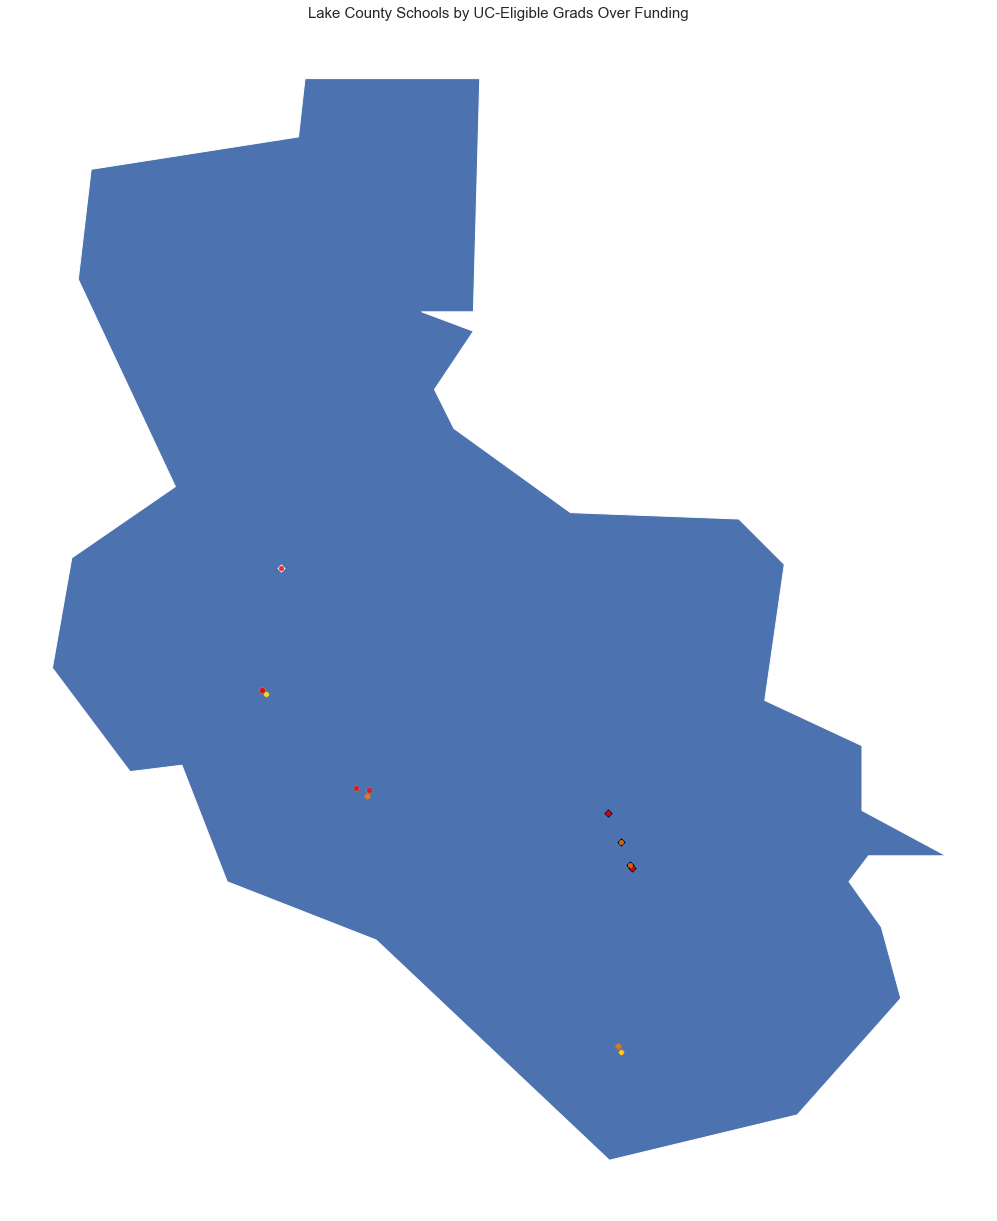

In [335]:
#Map everything
#red-purple is lowest-highest performing schools
#white-black is lowest-highest funded schools
fig, ax = plt.subplots(1, figsize=(17.62,25.87))
basemap = map_df.plot(ax=ax)
geocash20df.plot(ax=basemap, color='#FCFCFC', marker="D", markersize=25,alpha=0.8)

geocash40df.plot(ax=basemap, color='#BDBDBD', marker="D", markersize=25,alpha=0.8)
geocash60df.plot(ax=basemap, color='#7E7E7E', marker="D", markersize=25,alpha=0.8)
geocash80df.plot(ax=basemap, color='#3F3F3F', marker="D", markersize=25,alpha=0.8)
geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc20df.plot(ax=basemap, color='#F70707', marker="o", markersize=15,alpha=0.8)
geouc40df.plot(ax=basemap, color='#FF7700', marker="o", markersize=15,alpha=0.8)
geouc60df.plot(ax=basemap, color='#FFF707', marker="o", markersize=15,alpha=0.8)
geouc80df.plot(ax=basemap, color='#07FF77', marker="o", markersize=15,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')
ax.set_title("Lake County Schools by UC-Eligible Grads Over Funding", fontsize=15, fontweight=3)

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


(-123.13409, -122.30271, 38.61957, 39.62563)

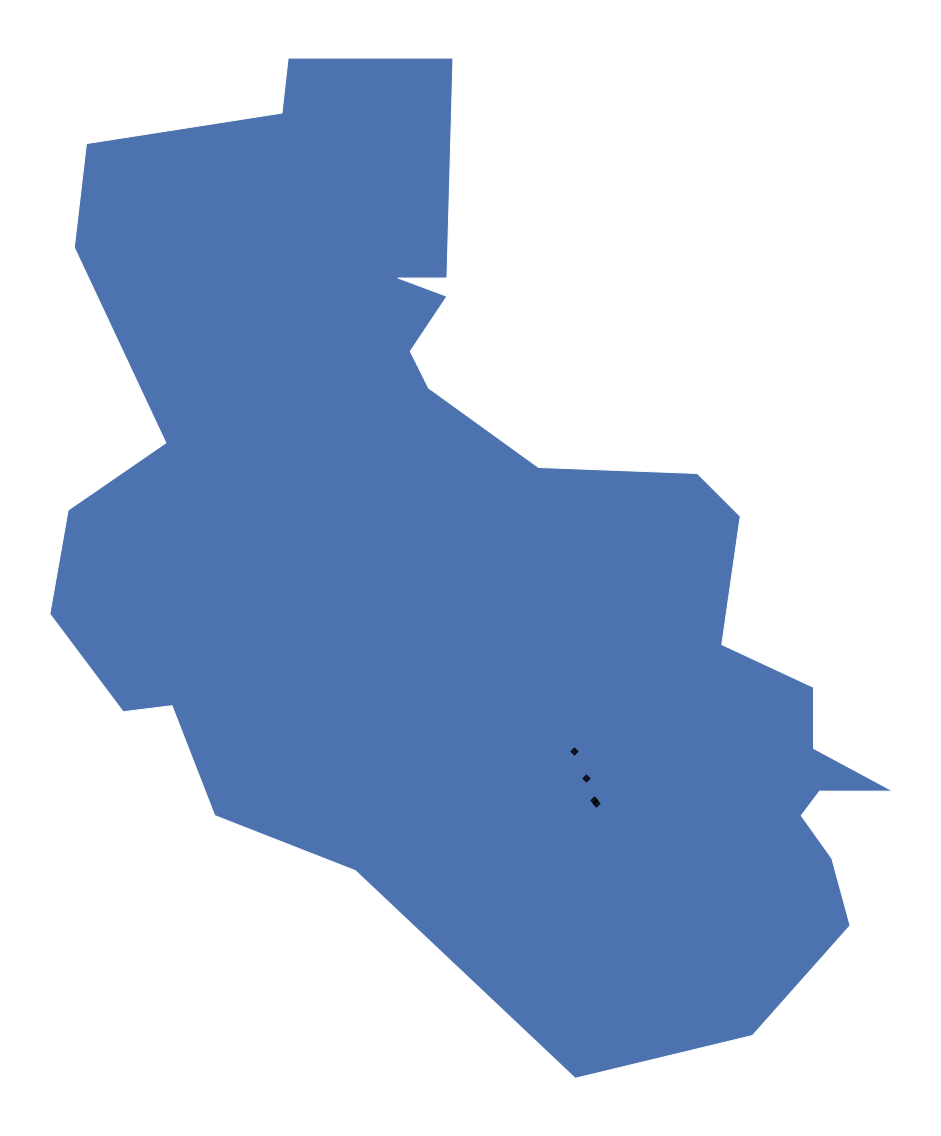

In [336]:
#Map of only the highest performing/funded schools
fig, ax = plt.subplots(1, figsize=(16.62,25.87))
basemap = map_df.plot(ax=ax)

geocash100df.plot(ax=basemap, color='#000000', marker="D", markersize=25,alpha=0.8)
geouc100df.plot(ax=basemap, color='#7700FF', marker="o", markersize=15,alpha=0.8)
ax.axis('off')

In [319]:
ultrageo = lageo[lageo['UC-EligiblePercent'].notna()]
ultrageo = lageo[lageo['CashPercent'].notna()]
ultrageo

,CDSCode,School,coordinates,binner,UC-EligiblePercent,CashBin,CashPercent
3453,17640141730043,Ed Donaldson Education Center,POINT (-122.8278121948242 38.97796249389648),0-20%,0.000000,41-60%,47.647864
3455,17640141730159,Kelseyville Community Day,POINT (-122.8390579223633 38.97980880737305),0-20%,0.000000,41-60%,47.647864
3456,17640141734359,Kelseyville High,POINT (-122.8301773071289 38.97248077392578),21-40%,21.739130,41-60%,47.647864
3467,17640220132571,Konocti Education Center,POINT (-122.6154708862305 38.93383026123047),21-40%,23.076923,81-100%,100.000000
3468,17640221730027,Carle (William C.) High (Continuation),POINT (-122.6058120727539 38.91189575195312),0-20%,0.000000,81-100%,100.000000
3470,17640221730118,Richard H. Lewis Alternative,POINT (-122.6263732910156 38.95823287963867),0-20%,0.000000,81-100%,100.000000
3472,17640221735000,Lower Lake High,POINT (-122.607780456543 38.91476821899414),21-40%,25.471698,81-100%,100.000000
3483,17640301730019,Natural High (Continuation),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692
3484,17640301730142,Lakeport Alternative (Home School),POINT (-122.9182662963867 39.06283187866211),0-20%,0.000000,41-60%,43.464692
3485,17640301732304,Clear Lake High,POINT (-122.9150314331055 39.05926132202148),41-60%,45.348837,41-60%,43.464692


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='UC-EligiblePercent', ylabel='CashPercent'>

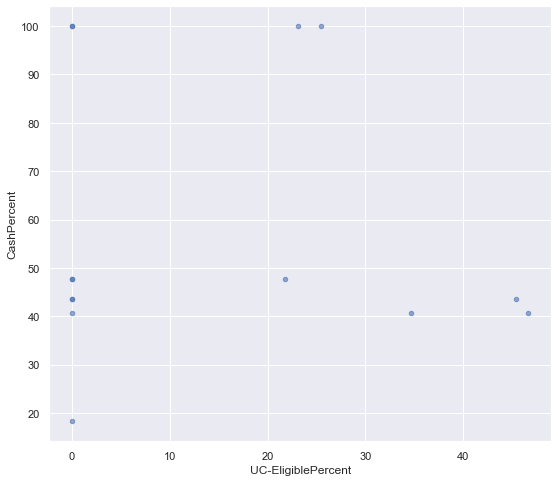

In [320]:
ultrageo.plot.scatter(x='UC-EligiblePercent', y='CashPercent',  figsize=(9,8), alpha=0.6)

# Correlation

Reference - https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/

Here we find the correlation between the most imporrtant parameters of the LA and the Lake City Dataframes.

1. Calculate the correlation between the UC-Eligible candidtates and CashPercent 

In [68]:
correlation = (lageo1["UC-EligiblePercent"].corr(lageo1["CPercent"])
correlation 

0.2643161387425792

Here we see that the result is closer to 1, which means these two features are highly correlated. This is a positive correlation. 

2. Plot a Correlation Matrix

In [233]:
corr = lageo1.corr()
corr.style.background_gradient(cmap='coolwarm')


,CDSCode,UC-EligiblePercent,CPercent
CDSCode,1.000000,-0.099648,-0.291625
UC-EligiblePercent,-0.099648,1.000000,0.264316
CPercent,-0.291625,0.264316,1.000000


3. Plotting Correlation HeatMap


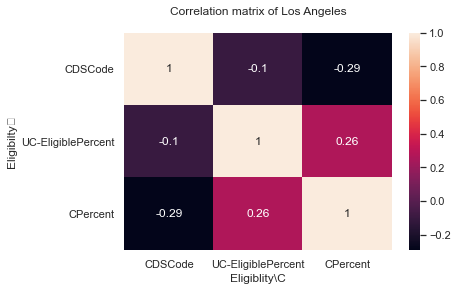

In [274]:
hm = sns.heatmap(lageo1.corr(), annot = True)

hm.set(xlabel='Eligiblity\C', ylabel='Eligibilty\t', title = "Correlation Heatmap of Los Angeles\n")

plt.show()

In [ ]:
From the above plot we understand that

In [276]:
#save the plot as an image file
plt.savefig("Plotting_Correlation_HeatMap_With_Axis_Titles1.png")


<Figure size 432x288 with 0 Axes>

4. Plotting Correlation Scatter Plot With Linear Regression Fit Line


<AxesSubplot:xlabel='UC-EligiblePercent', ylabel='CPercent'>

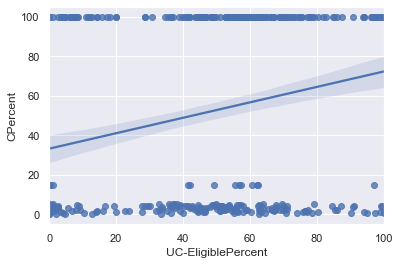

In [279]:
# use the function regplot to make a scatterplot
sns.regplot(x=lageo1["UC-EligiblePercent"], y=lageo1["CPercent"])#the linear line can be enabled or disabled using the fit_reg. Here it is enabled by default

#plt.savefig("Plotting_Correlation_Scatterplot_With_Regression_Fit.jpg")

From the above plots it is understood that the CPercent(cash) required is not linearly propotional to the Eligibility criteria.If you have more money doesn't mean you are merit candidate.

1. Calculate the correlation between the UC-Eligible candidtates and CashPercent 

In [321]:
correlation = ultrageo["UC-EligiblePercent"].corr(ultrageo["CashPercent"])
correlation 

-0.040740850494630616

The correlation is negative. which means that here the data and the amount of money doesnt confirm thr eligibilty criteria.

2. Plot a Correlation Matrix 

In [322]:
corr = ultrageo.corr()
corr.style.background_gradient(cmap='coolwarm')

,CDSCode,UC-EligiblePercent,CashPercent
CDSCode,1.000000,-0.220499,-0.405999
UC-EligiblePercent,-0.220499,1.000000,-0.040741
CashPercent,-0.405999,-0.040741,1.000000


3. Plot a Correation Heatmap

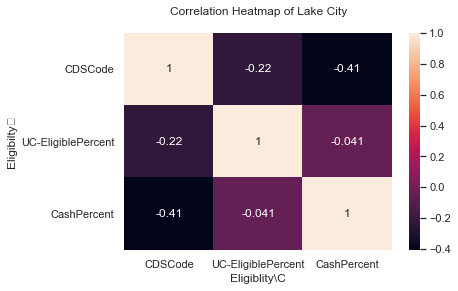

In [324]:
hm = sns.heatmap(ultrageo.corr(), annot = True)

hm.set(xlabel='Eligiblity\C', ylabel='Eligibilty\t', title = "Correlation Heatmap of Lake City\n")

plt.show()

4. Plotting Correlation Scatter Plot With Linear Regression Fit Line


<AxesSubplot:xlabel='UC-EligiblePercent', ylabel='CashPercent'>

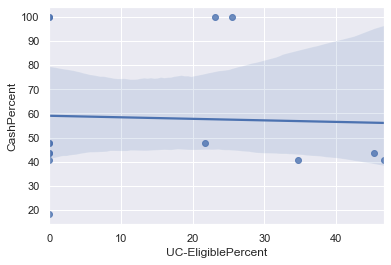

In [326]:
# use the function regplot to make a scatterplot
sns.regplot(x=ultrageo["UC-EligiblePercent"], y=ultrageo["CashPercent"])#the linear line can be enabled or disabled using the fit_reg. Here it is enabled by default

#plt.savefig("Plotting_Correlation_Scatterplot_With_Regression_Fit.jpg")

The plots show us that in the Lake County there is very thin correlation between the cash percentage and the eligibility rate of students.

*CONCLUSION* - From all the plots and the analysis we can conclude that the Funding, expenses is not directly related or propotional to the number of UC Eligible Graduates state schools produce or the students that graduate. More Funding to the school does not necessarily mean higher number of Eligible candidates.